# Advanced Statistics for Physics- RLab03

### Student 
Luca Menti

### ID
2063594

### e-mail
luca.menti@studenti.unipd.it

### Course
Physics of Data



# EXERCISE 1

## The triangular distribution, in the interval (a, b), is given by the following:

# $$
f(x)= \left\{
    \begin{array}\\
        \frac{2(x-a)}{(b-a)(c-a)} & \mbox{if } \ a\leq x<c\\
        \frac{2(b-x)}{(b-a)(c-a)} & \mbox{if } \ c\leq x\leq b\\
        0 & \mbox{if } \ Otherwise \\
    \end{array}
\right.
$$

## where $c$ ∈ [$a$,$ b$].

## 1) Plot the function given theinterval(a,b)

In [2]:
#usefull library
library(readr)
library (curl)
library(lubridate)
library(tidyr)
library(dplyr)
library(ggplot2)
library(IRdisplay)

### PDF

In [3]:
triang<- function(x,a=2,b=3,c=2.5){
    return(ifelse(a <=x&x< c,2*(x-a)/((b-a)*(c-a)),
                  ifelse(c<=x & x<=b,2*(b-x)/((b-a)*(b-c)),0)
                  )
           )
    }

### CDF

In [4]:
cdf<-  function(x,a=2,b=3,c=2.5){
    return(ifelse(a <=x&x< c,(x-a)^2/((c-a)*(b-a)),
                  ifelse(c<=x & x<=b,(c-a)/(b-a) - (2*b*c)/((b-a)*(b-c))+(c^2 +2*b*x-x^2)/((b-a)*(b-c)),
                         ifelse(x<a,0,ifelse(b<=x,1,0)))
                  )
           )
    }

### Plot of PDF and CDF

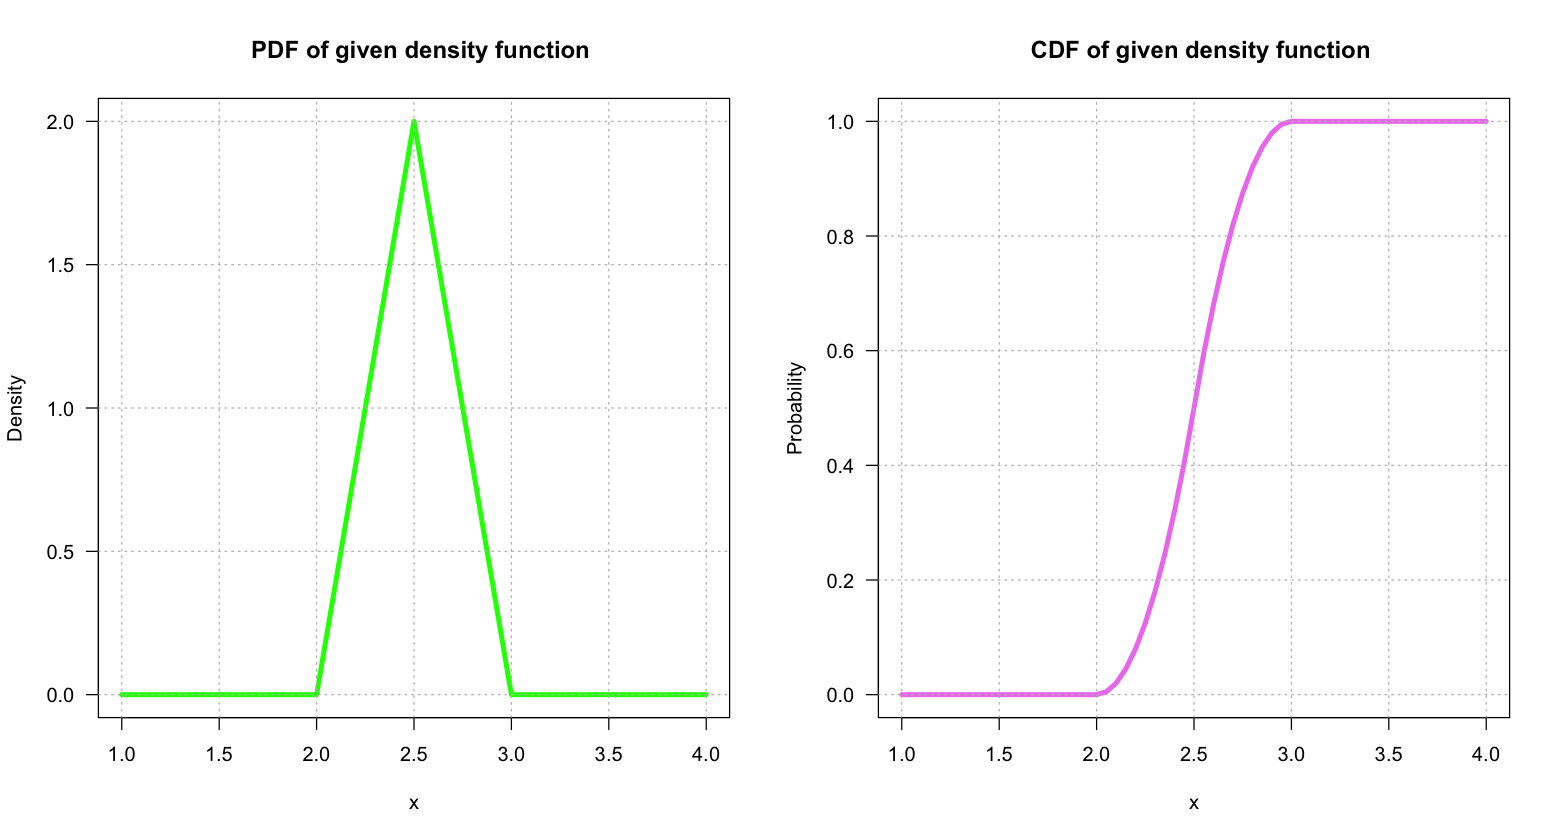

In [5]:
options(repr.plot.width=13, repr.plot.height=7)

par(mfrow=c(1,2))

#value for pdf 
x<-seq(1,4,0.05)
y<-triang(x)

#plot pdf
plot (x,y,
      type="l",
      col="green", 
      xlab=" x ",
      ylab="Density",
      las=1,
      lwd=4,
      main="  PDF of given density function")

#grid
grid(nx=NULL, ny=NULL, lty=3, col="gray",lwd=1) 


#plot Cdf 
y1<-cdf(x)

plot(x,y1,
     type="l", 
     col="violet", 
     xlab=" x ",
     ylab="Probability",
     las=1,
     lwd=4,
     main="  CDF of given density function")

#grid
 grid(nx=NULL,
      ny=NULL,
      lty=3,
      col="gray",
      lwd=1) 

### Plot CDF vs PDF

It' s good to underline that PDF and CDF have two differents y-axises that's why I plotted PDF vs CDF with 2 differents y-axises. In particular on the left there's CDF's y-axis while on the right there's PDF's y-axis. If you don't underline this difference the plot CDF VS PDF wouldn't make any sense.

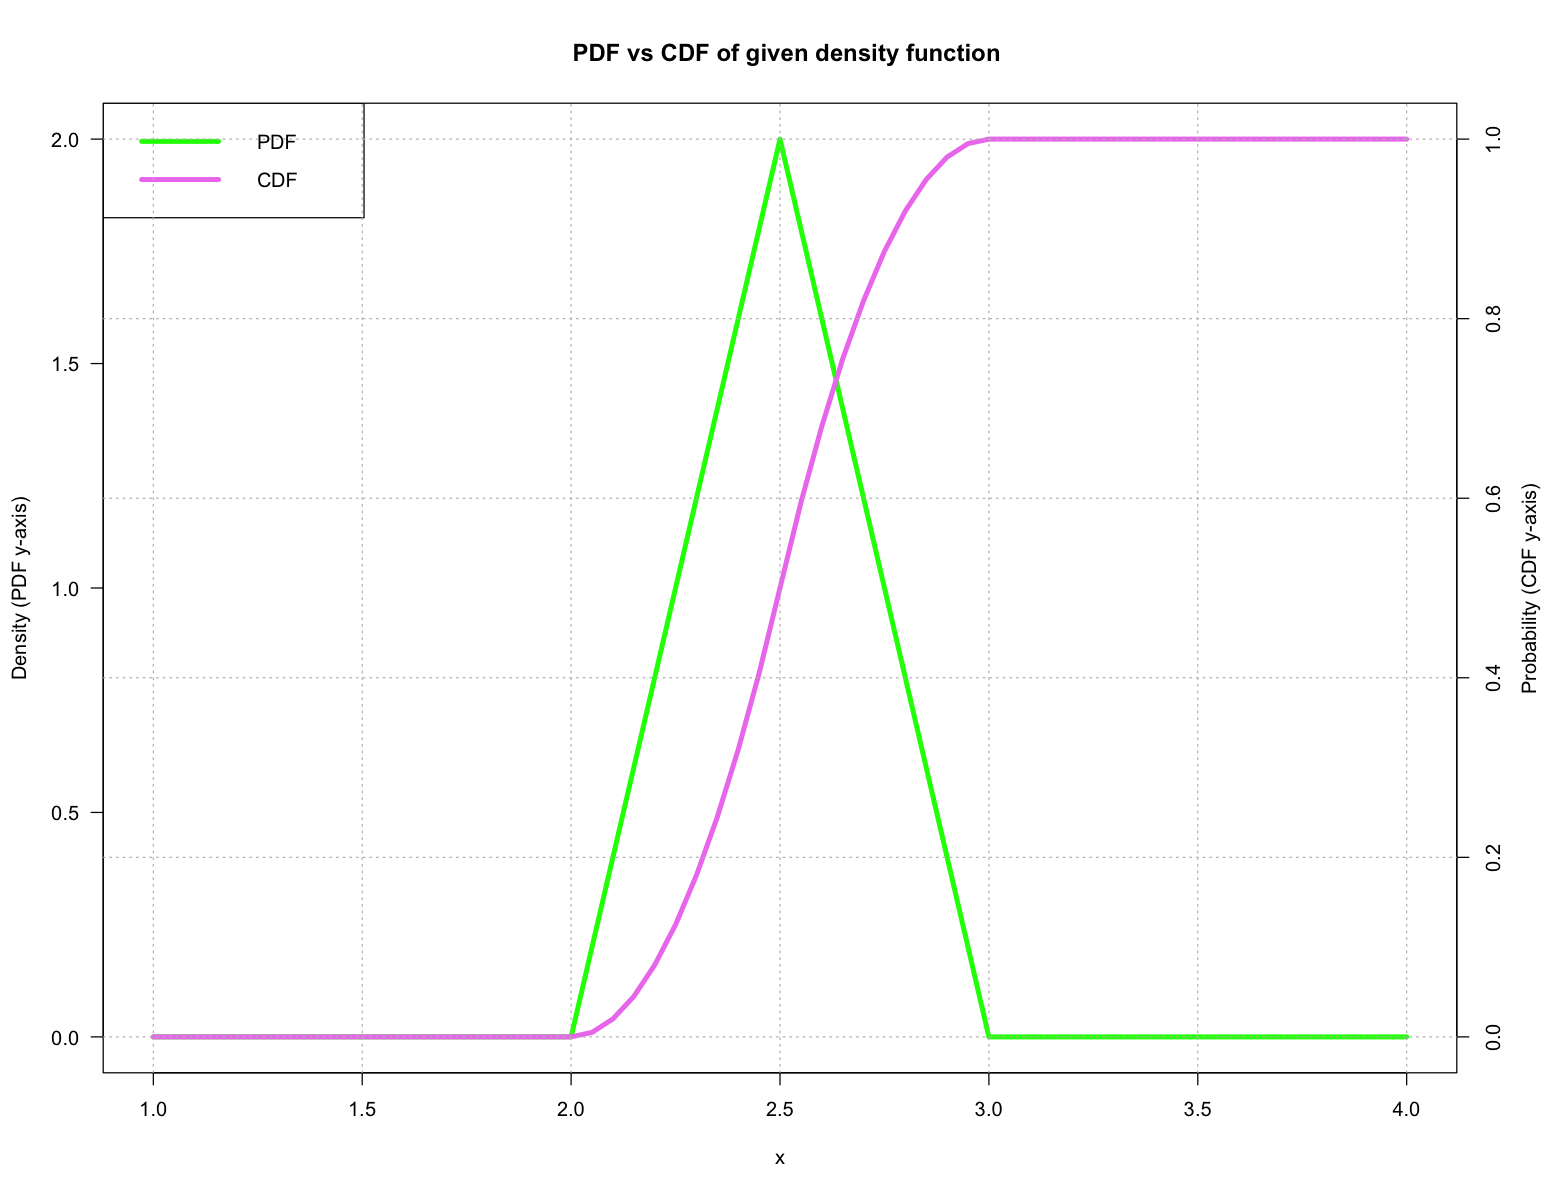

In [6]:
#plot Cdf vs Pdf 
options(repr.plot.width=13, repr.plot.height=10)

par(mar= c(5,4,4,4)+0.3)

plot(x,y,
     type="l",
     col="green", 
     las=1,
     lwd=4,
     xlab="x",
     ylab="",
     main="  PDF vs CDF of given density function")

par(new=TRUE)

plot(x,y1,
     type="l", 
     col="violet", 
     las=1,
     lwd=4,
     axes=FALSE,
     xlab=" ",
     ylab="Density (PDF y-axis)",)



axis(side=4,at=pretty(range(y1)))
mtext("Probability (CDF y-axis)",side=4,line=2.5)

#legend
legend(x = "topleft",
       col = c("green", "violet"),
       lty = 1,
       lwd = 4,
       legend = c('PDF', 'CDF')) 

#grid
grid(nx=NULL,
     ny=NULL,
     lty=3,
     col="gray",
     lwd=1) 

## 2) Write an algorithm to generate random numbers from the triangular distribution

To generate random numbers from the triangular distribution we can follow this strategy:

- Compute the CDF for the distribution which is given in this case by 
$$
F(x)= \int_{-\infty}^{x} f(y)dy= \left\{
    \begin{array}\\
        \frac{(x-a)^2}{(b-a)(c-a)} & \mbox{if } \ a\leq x<c\\
        \frac{c^2 +2bx -x^2}{(b-a)(c-a)}+\frac{c-a}{b-a}-\frac{2bc}{(b-a)(b-c)} & \mbox{if } \ c\leq x\leq b\\
        0 & \mbox{if } \ x<a \\
         1 & \mbox{if } \ x>b \\
    \end{array}
\right.
$$

- Compute the quantile function given by the inverse of CDF that in this case is equal to
$$
Quantile[f](q)=F^{-1}(q)= \left\{
    \begin{array}\\
        a+ \sqrt{q(c-a)(b-a)} & \mbox{if } \ 0\leq q< \frac{c-a}{b-a}\\
        b- \sqrt{- ab + b^{2}+ ac - bc + abq - b^{2}q - acq + bcq}  & \mbox{if } \ \frac{c-a}{b-a} \leq q\leq 1\\
    \end{array}
\right.
$$

- Using runif() function -> Quantile(runif())




### Quantile function

In [7]:
quantile_f <- function(q,a=2,b=3,c=2.5){
    
    return(ifelse(q>=0 & q<=1, 
                  ifelse(q<(c-a)/(b-a),a+sqrt(q*(c-a)*(b-a)),b - sqrt(- a*b + b^2+ a*c - b*c + a*b*q - (b^2)*q - a*c*q + b*c*q)),"no value"))
    }

print(quantile_f(0.5))
print(quantile_f(2))

[1] 2.5
[1] "no value"


### Random function

In [8]:
random_function <- function(n, a=2, b=3, c= 2.5) {
    return(quantile_f(runif(n)))
}

In [9]:
#value for pdf 
x<-seq(1,4,0.05)
y<-triang(x)


#number of variables
n=10^4

#vector with variables
df<-(random_function(n))

#check the randomness
df[0:5]

[1] 2.170002 2.515942 2.557329 2.645841 2.594858

## 3)Generate $10^4$ random number from the distribution, show them in an histogram and superimpose the analytical curve

#### $n$ = $10^4$

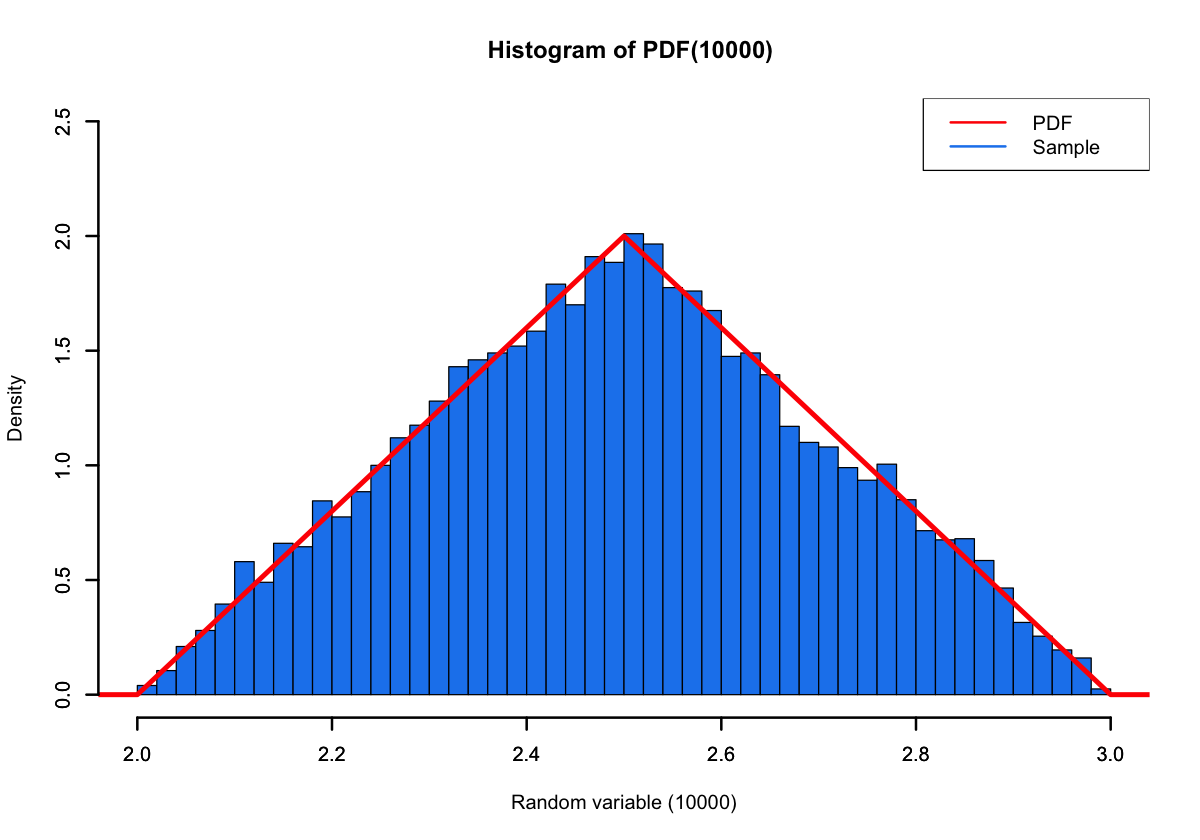

In [10]:

#number of variables
n=10^4

#vector with variables
df<-(random_function(n))

# plot histogram for random sample
options(repr.plot.width=10, repr.plot.height=7)

hist(df,
     freq = FALSE,
     ylim=c(0,2.5),
     breaks=50,
     col="dodgerblue2",
     xlab=" Random variable (10000) ",
     ylab="Density", 
     main="  Histogram of PDF(10000)")


# pdf
lines(x,y,
      type="l",
      col="red", 
      las=1,
      lwd=4,)

axis(side=1,lwd=2)
axis(side=2,lwd=2)

#legend
legend(x = "topright",
       col = c("red", "dodgerblue2"),
       lty = 1,
       lwd = 2,
       legend = c('PDF',"Sample")) 

Let's  show that if we use a bigger  $n$  we have more accuracy.

####  $n$= $10^6$

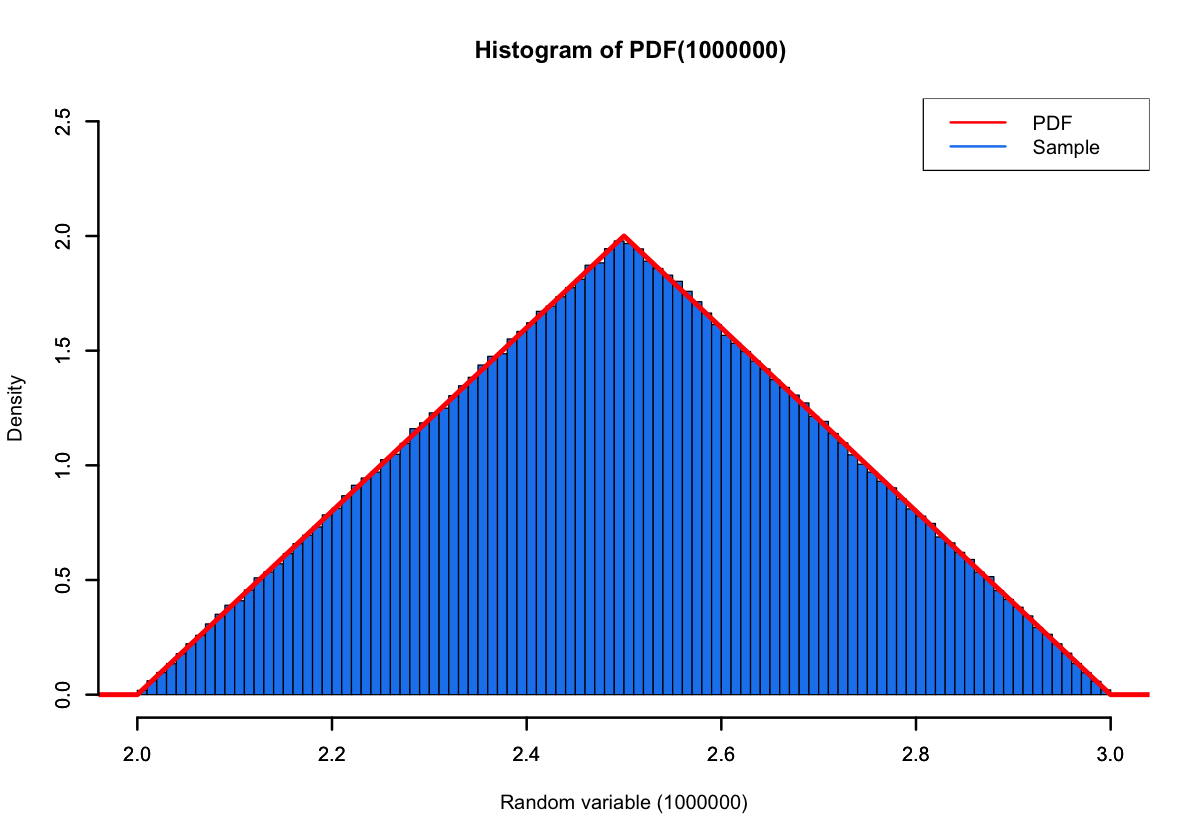

In [11]:
#number of variables
n=10^6

#vector with variables
df<-(random_function(n))

# plot histogram for random sample
options(repr.plot.width=10, repr.plot.height=7)

hist(df,
     freq = FALSE,
     ylim=c(0,2.5),
     breaks=100,
     col="dodgerblue2",
     xlab=" Random variable (1000000) ",
     ylab="Density", 
     main="  Histogram of PDF(1000000)")


# pdf
lines(x,y,
      type="l",
      col="red", 
      las=1,
      lwd=4,)

axis(side=1,lwd=2)
axis(side=2,lwd=2)

#legend
legend(x = "topright",
       col = c("red", "dodgerblue2"),
       lty = 1,
       lwd = 2,
       legend = c('PDF',"Sample")) 

####  $n$= $10^8$

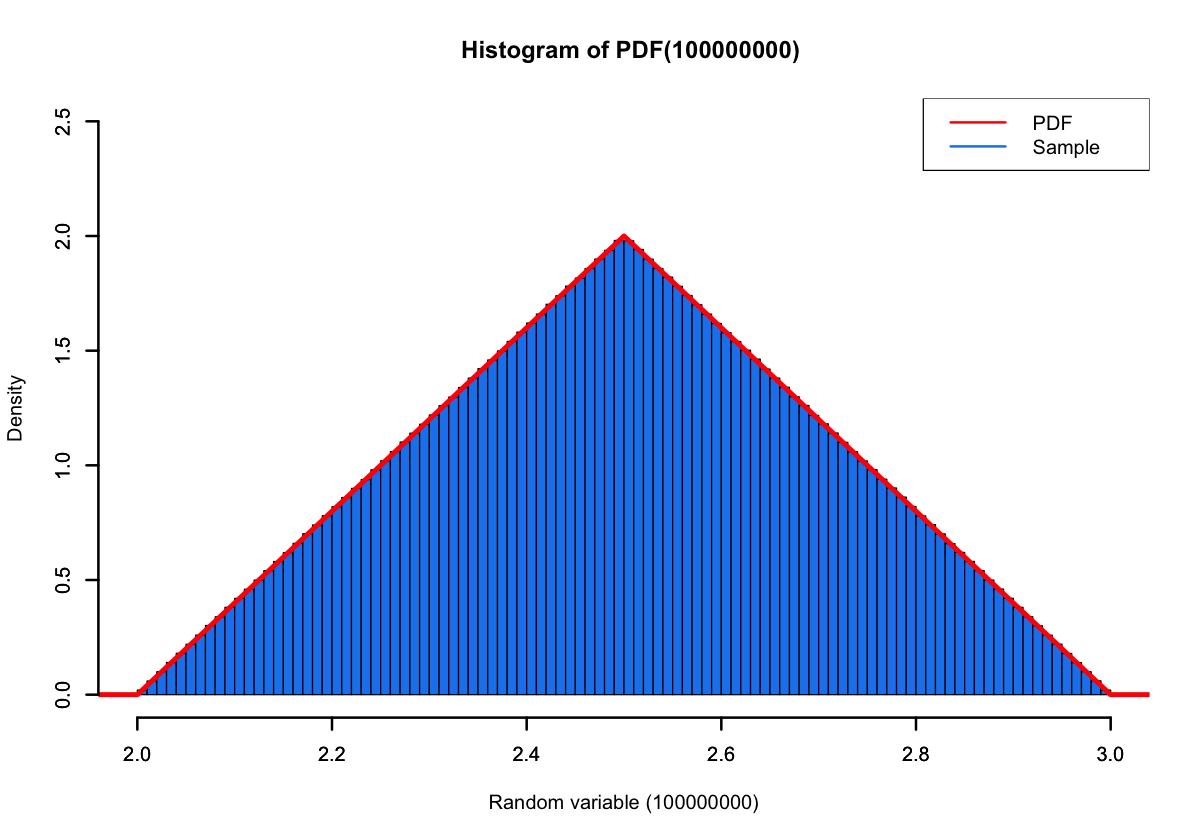

In [12]:
#number of variables
n=10^8

#vector with variables
df<-(random_function(n))

# plot histogram for random sample
options(repr.plot.width=10, repr.plot.height=7)

hist(df,
     freq = FALSE,
     ylim=c(0,2.5),
     breaks=100,
     col="dodgerblue2",
     xlab=" Random variable (100000000) ",
     ylab="Density", 
     main="  Histogram of PDF(100000000)")


# pdf
lines(x,y,
      type="l",
      col="red", 
      las=1,
      lwd=4,)

axis(side=1,lwd=2)
axis(side=2,lwd=2)

#legend
legend(x = "topright",
       col = c("red", "dodgerblue2"),
       lty = 1,
       lwd = 2,
       legend = c('PDF',"Sample")) 

# EXERCISE 2

## Markov’s inequality represents an upper bound to probability distributions:
## $$
P(X\geq k) \leq \frac{E[X]}{k} \ for \ k > 0 \\
$$
## having defined a function
## $$
G(k)= 1- F(k):= P(X\geq k)
$$
## plot $G(k)$ and the Markov’s upper bound for:


## 1) the exponential $Exp(\lambda = 1)$ distribution function

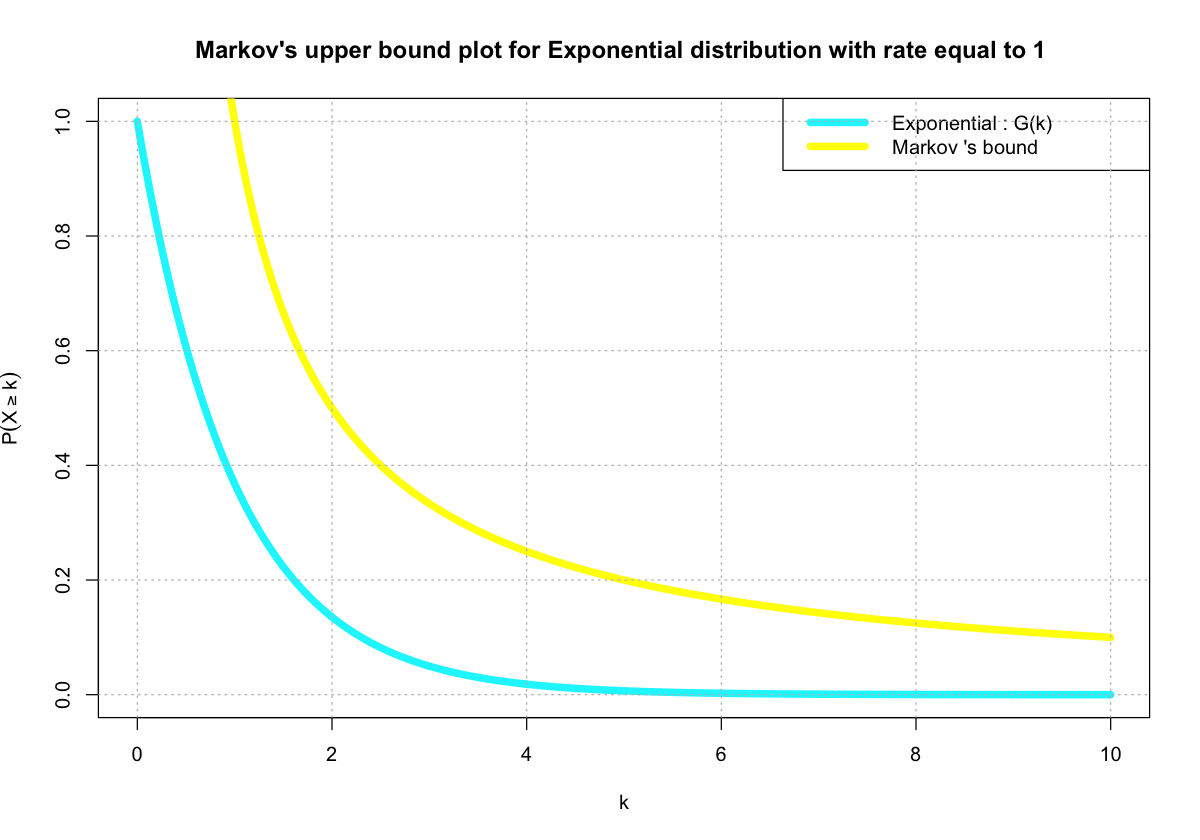

In [13]:
#G(x)
k<-seq(0,10,0.01)

g<-1 - pexp(k, rate=1)

#markov
m<-1/k


options(repr.plot.width=10, repr.plot.height=7)


plot(k,g,
     type="l",
     col="turquoise1", 
     lwd=6,
     xlab="k",
     main="Markov's upper bound plot for Exponential distribution with rate equal to 1 ",
     ylab = expression(P(X>=k),
     ylim=c(0,0.5)))

lines (k,m,
     type="l", 
     col="yellow1", 
     las=1,
     lwd=6)



#legend
legend(x = "topright",
       col = c("turquoise1", "yellow1"),
       lty = 1,
       lwd = 6,
       legend = c('Exponential : G(k)', 'Markov \'s bound')) 

#grid
grid(nx=NULL,
     ny=NULL,
     lty=3,
     col="gray",
     lwd=1) 

## 2) the uniform $U(3,5)$ distribution function

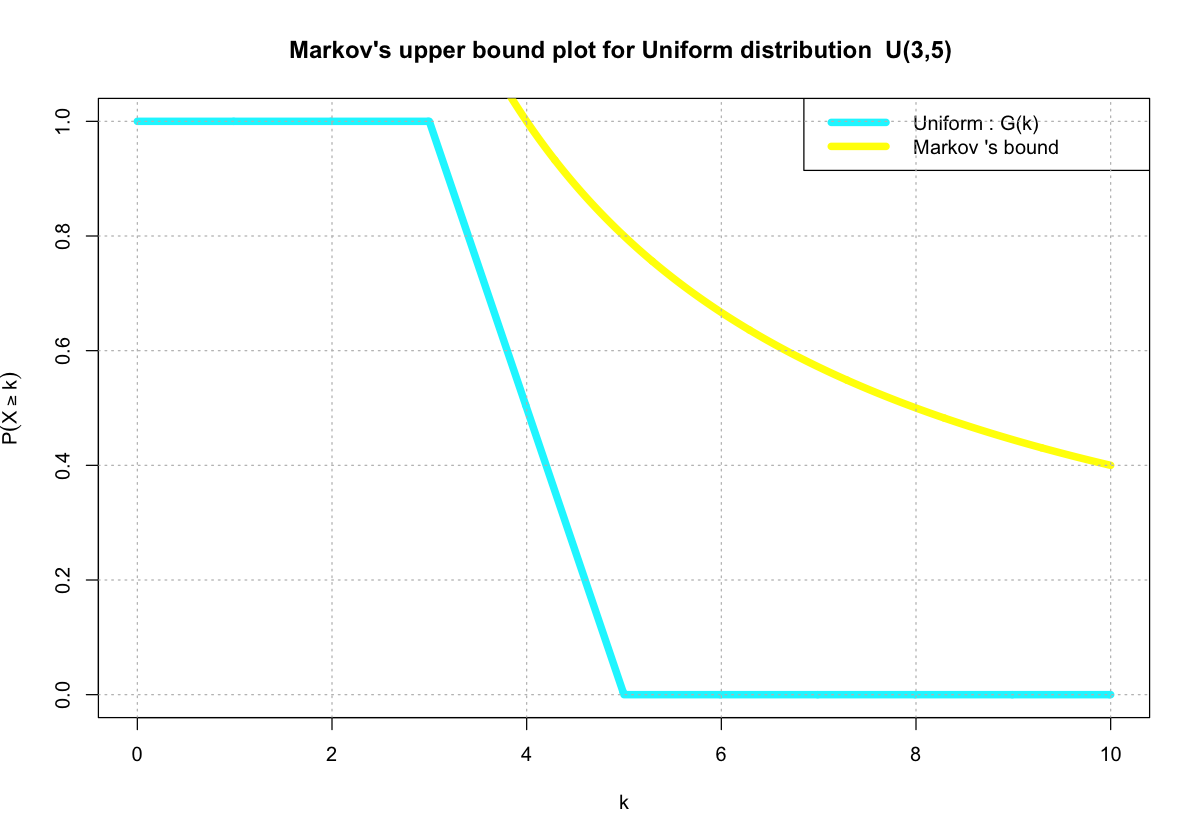

In [14]:
#G(x)
k<-seq(0,10,0.01)

g<-1 - punif(k,min=3,max=5)

#markov
m<-4/k


options(repr.plot.width=10, repr.plot.height=7)


plot(k,g,
     type="l",
     col="turquoise1", 
     lwd=6,
     xlab="k",
     main="Markov's upper bound plot for Uniform distribution  U(3,5) ",
     ylab = expression(P(X>=k),ylim=c(0,1),
     ))

lines (k,m,
     type="l", 
     col="yellow1", 
     las=1,
     lwd=6)



#legend
legend(x = "topright",
       col = c("turquoise1", "yellow1"),
       lty = 1,
       lwd = 6,
       legend = c('Uniform : G(k)', 'Markov \'s bound')) 

#grid
grid(nx=NULL,
     ny=NULL,
     lty=3,
     col="gray",
     lwd=1) 

## 3) The binomial, Bin($n$ = 1, $p$ = 1/2), distribution function

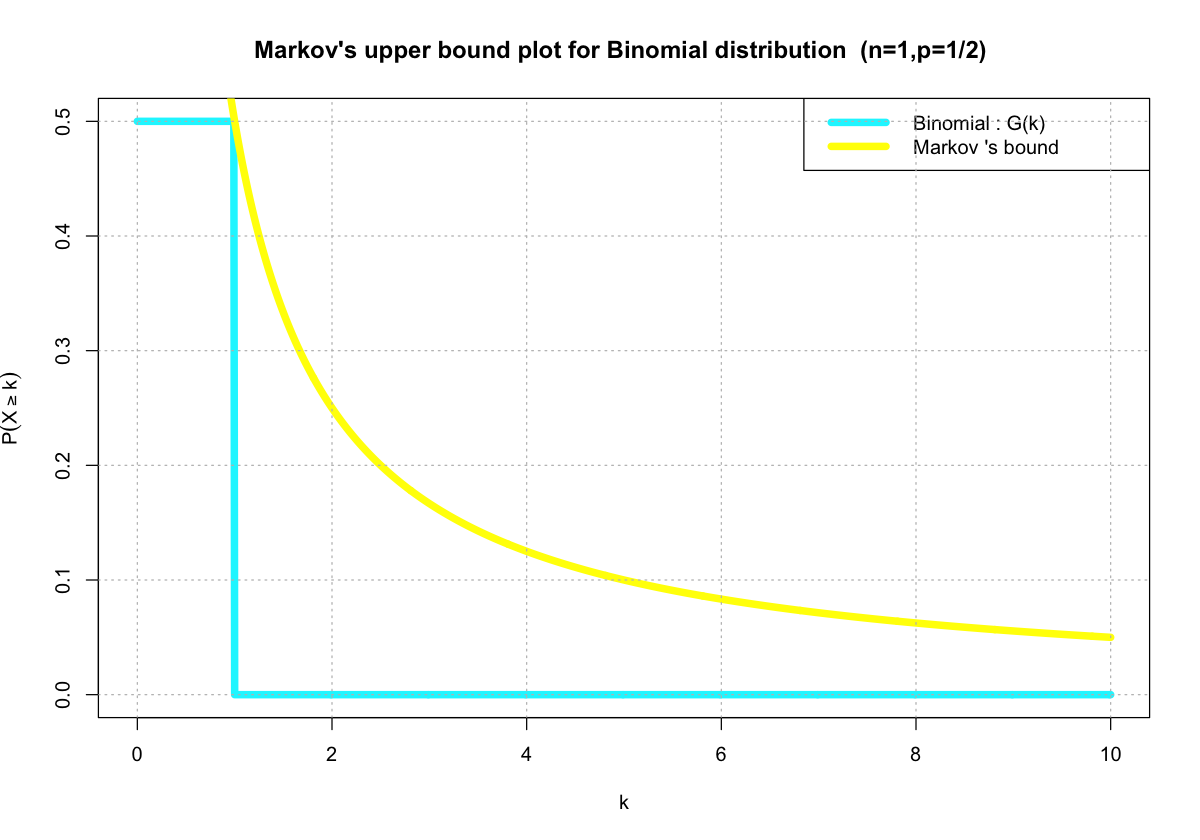

In [15]:
#G(x)
k<-seq(0,10,0.01)

g<-1 - pbinom(k, 1, 1/2)

#markov
m<-(1/2)/k


options(repr.plot.width=10, repr.plot.height=7)


plot(k,g,
     type="l",
     col="turquoise1", 
     lwd=6,
     xlab="k",
     main="Markov's upper bound plot for Binomial distribution  (n=1,p=1/2) ",
     ylab = expression(P(X>=k),ylim=c(0,1),
     ))

lines (k,m,
     type="l", 
     col="yellow1", 
     las=1,
     lwd=6)



#legend
legend(x = "topright",
       col = c("turquoise1", "yellow1"),
       lty = 1,
       lwd = 6,
       legend = c('Binomial : G(k)', 'Markov \'s bound')) 

#grid
grid(nx=NULL,
     ny=NULL,
     lty=3,
     col="gray",
     lwd=1) 

## 4) a Poisson, Pois($\lambda$ = 1/2), distribution function

Warning message in title(...):
“conversion failure on 'Markov's upper bound plot for Poissin distribution  (λ=1/2) ' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in title(...):
“conversion failure on 'Markov's upper bound plot for Poissin distribution  (λ=1/2) ' in 'mbcsToSbcs': dot substituted for <bb>”

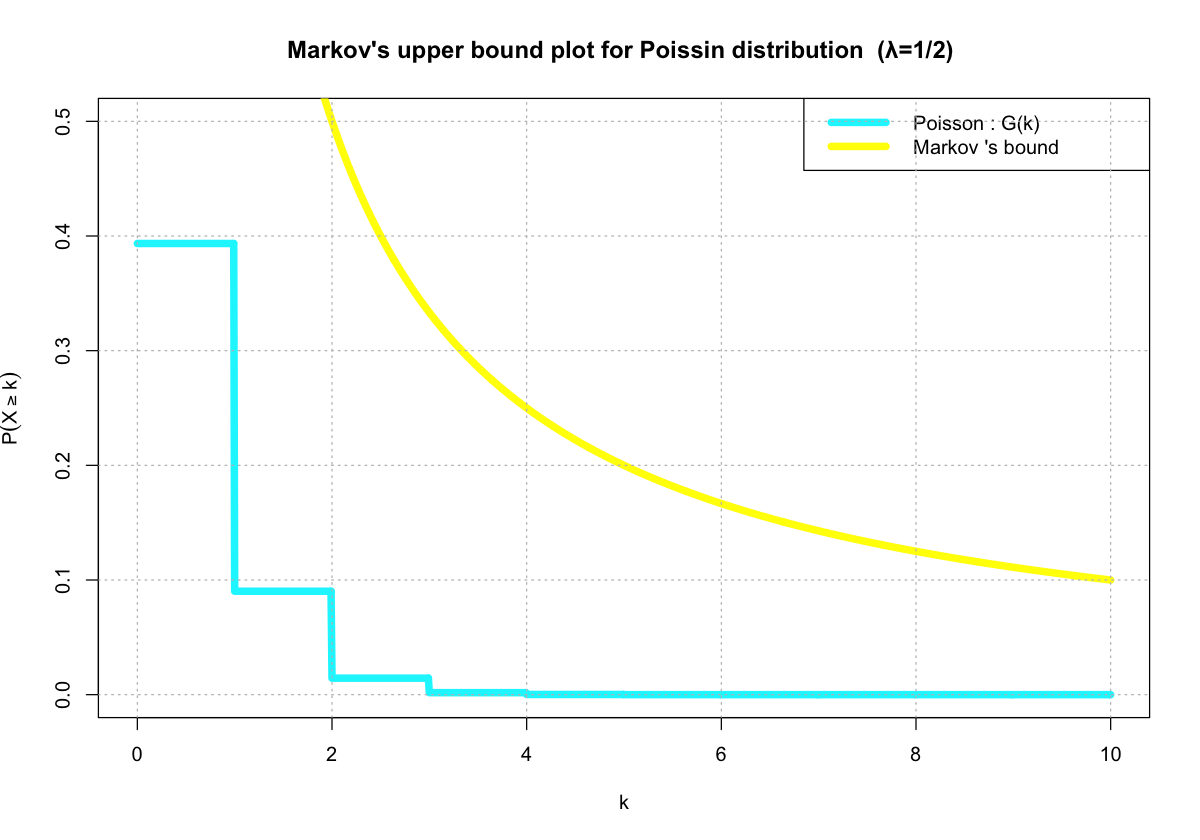

In [16]:
#G(x)
k<-seq(0,10,0.01)

g<-1 - ppois(k, 1/2)

#markov ??? perche non 1/2/k?
m<-(1)/k


options(repr.plot.width=10, repr.plot.height=7)


plot(k,g,
     type="l",
     col="turquoise1", 
     lwd=6,
     xlab="k",
     ylim=c(0,0.5),
     main="Markov's upper bound plot for Poissin distribution  (λ=1/2) ",
     ylab = expression(P(X>=k)))

lines (k,m,
     type="l", 
     col="yellow1", 
     las=1,
     lwd=6)




#legend
legend(x = "topright",
       col = c("turquoise1", "yellow1"),
       lty = 1,
       lwd = 6,
       legend = c('Poisson : G(k)', 'Markov \'s bound')) 

#grid
grid(nx=NULL,
     ny=NULL,
     lty=3,
     col="gray",
     lwd=1) 

# EXERCISE 3

## Chebyshev’s inequality tell us that
## $$
P(|X - \mu| \geq k\sigma) \leq \frac{1}{k^2}
$$
## which can also be written as
## $$
P(|X - \mu| < k\sigma) \geq 1 -  \frac{1}{k^2}
$$
## use R to show, with a plot, that Chebyshev’s inequality is is an upper bound to the following distributions.

## 1) a normal distribution, $N$($\mu$ = 3, $\sigma$ = 5)

### N.B:

Using  Chebyshev's inequality
$$
P(|X - \mu| < k\sigma) \geq 1 -  \frac{1}{k^2}
$$

It is possible to consider
$$
P(|X - \mu| < k \sigma)=  P(X< \mu +k \sigma)- P(X < \mu -k \sigma)
$$

Hence,

$$
CDF( \mu + k \sigma)- CDF( \mu -k \sigma) \geq 1- \frac{1}{k^2}
$$


Warning message in title(...):
“conversion failure on 'Chebyshev’s  upper bound plot for Normal  distribution' in 'mbcsToSbcs': dot substituted for <e2>”Warning message in title(...):
“conversion failure on 'Chebyshev’s  upper bound plot for Normal  distribution' in 'mbcsToSbcs': dot substituted for <80>”Warning message in title(...):
“conversion failure on 'Chebyshev’s  upper bound plot for Normal  distribution' in 'mbcsToSbcs': dot substituted for <99>”

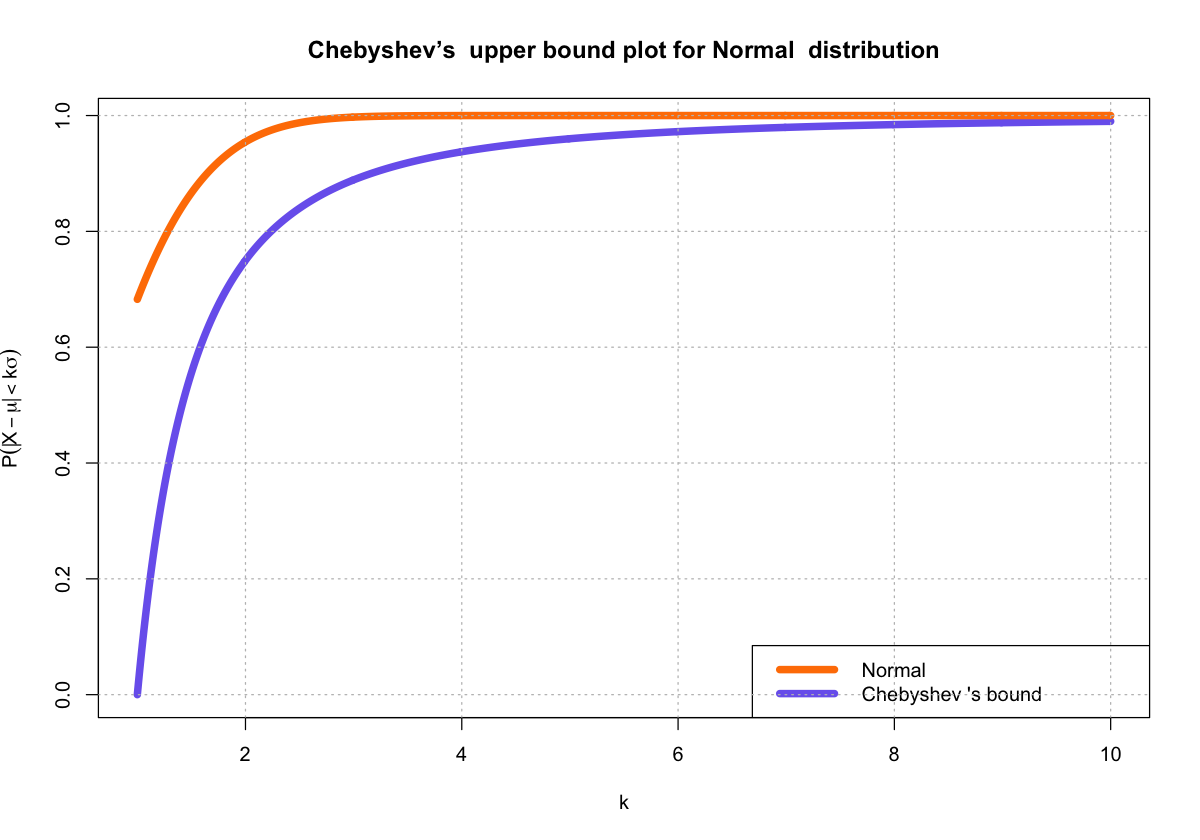

In [17]:
#normal parameters
k<-seq(1,10,0.01)
mu<- 3
sigma<- 5 

#normal cdf
g<-pnorm(k*sigma+mu, mu, sigma, lower.tail = TRUE, log.p = FALSE)-pnorm(-k*sigma+mu, mu, sigma, lower.tail = TRUE, log.p = FALSE)
#Chebyshev
c<- 1-1/k^2


options(repr.plot.width=10, repr.plot.height=7)


plot(k,c,
     type="l",
     col="slateblue2", 
     lwd=6,
     xlab="k",
     main="Chebyshev’s  upper bound plot for Normal  distribution",
      ylab = expression(P( abs( X - mu) <  k*sigma)))

lines (k,g,
     type="l", 
     col="darkorange1", 
     las=1,
     lwd=6,
      ylim=c(0,0.4))


#legend
legend(x = "bottomright",
       col = c("darkorange1", "slateblue2"),
       lty = 1,
       lwd = 6,
       legend = c('Normal ', 'Chebyshev \'s bound')) 

#grid
grid(nx=NULL,
     ny=NULL,
     lty=3,
     col="gray",
     lwd=1) 

## 2) an exponential distribution $Exp(\lambda = 1)$ 

Warning message in title(...):
“conversion failure on 'Chebyshev’s  upper bound plot for Exponential distribution' in 'mbcsToSbcs': dot substituted for <e2>”Warning message in title(...):
“conversion failure on 'Chebyshev’s  upper bound plot for Exponential distribution' in 'mbcsToSbcs': dot substituted for <80>”Warning message in title(...):
“conversion failure on 'Chebyshev’s  upper bound plot for Exponential distribution' in 'mbcsToSbcs': dot substituted for <99>”

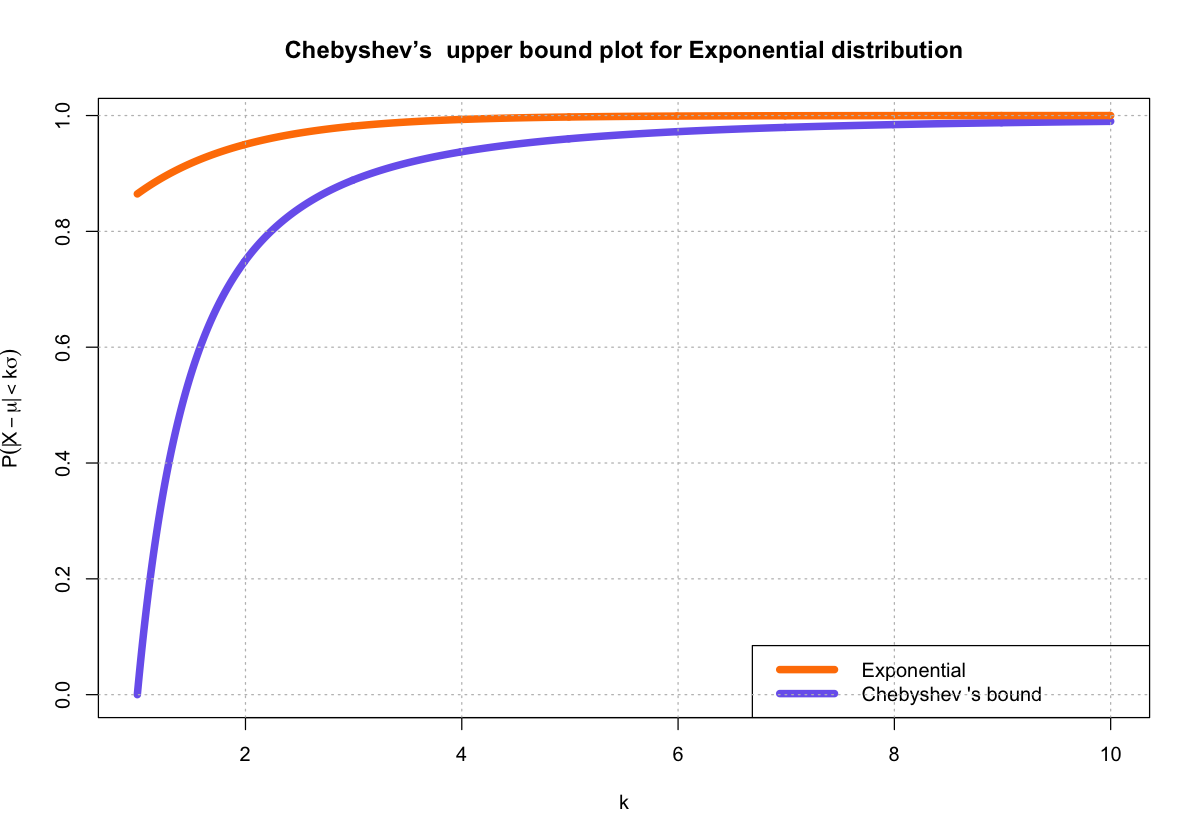

In [18]:
#exponential parameters
k<-seq(1,10,0.01)
lamda<-1
E<- 1/lamda
sigma<-1/lamda

#exponential cdf
g<-pexp(k*sigma+E,  lamda)-pexp(-k*sigma+E, lamda)
#Chebyshev
c<- 1-1/k^2


options(repr.plot.width=10, repr.plot.height=7)


plot(k,c,
     type="l",
     col="slateblue2", 
     lwd=6,
     xlab="k",
     main="Chebyshev’s  upper bound plot for Exponential distribution",
      ylab = expression(P( abs( X - mu) <  k*sigma)))

lines (k,g,
     type="l", 
     col="darkorange1", 
     las=1,
     lwd=6)



#legend
legend(x = "bottomright",
       col = c("darkorange1", "slateblue2"),
       lty = 1,
       lwd = 6,
       legend = c('Exponential ', 'Chebyshev \'s bound')) 

#grid
grid(nx=NULL,
     ny=NULL,
     lty=3,
     col="gray",
     lwd=1) 



## 3) a Uniform distribution $U$ (1 − $\sqrt{2}$, 1 + $\sqrt{2}$)

Warning message in title(...):
“conversion failure on 'Chebyshev’s  upper bound plot for Uniform  distribution' in 'mbcsToSbcs': dot substituted for <e2>”Warning message in title(...):
“conversion failure on 'Chebyshev’s  upper bound plot for Uniform  distribution' in 'mbcsToSbcs': dot substituted for <80>”Warning message in title(...):
“conversion failure on 'Chebyshev’s  upper bound plot for Uniform  distribution' in 'mbcsToSbcs': dot substituted for <99>”

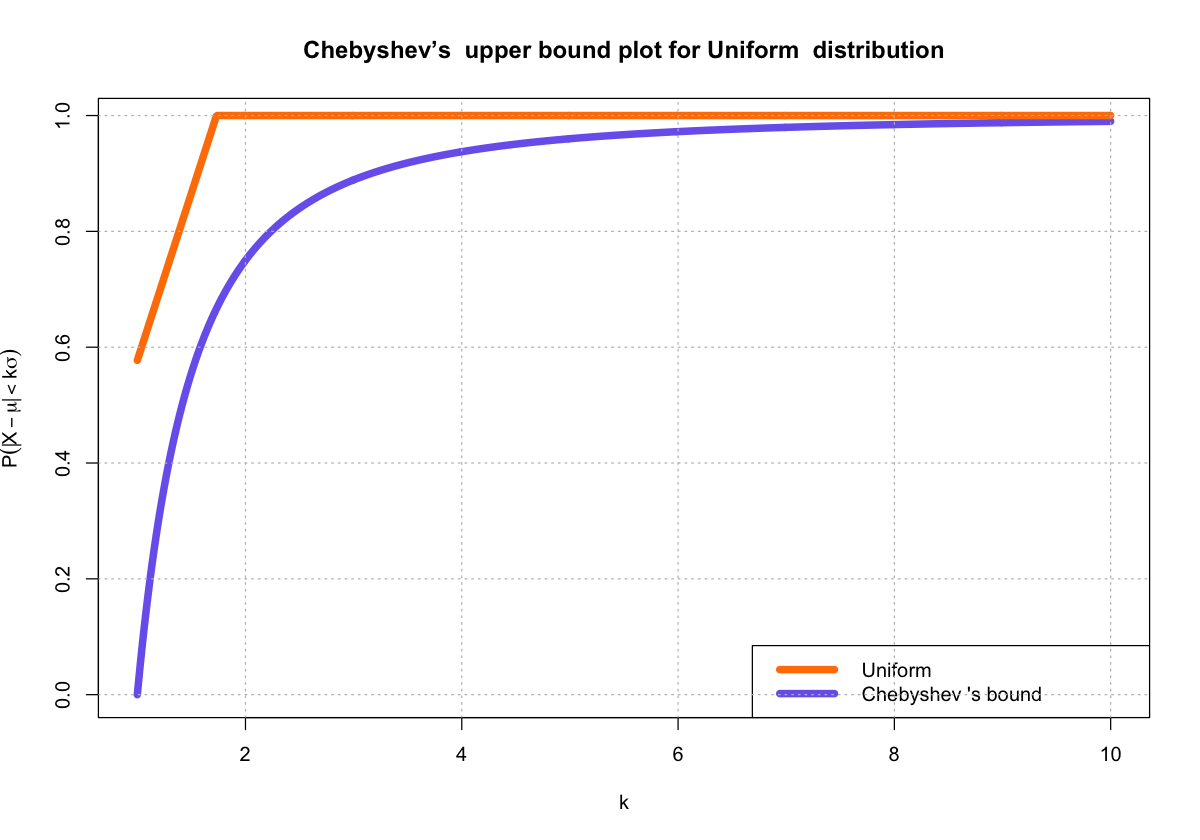

In [19]:
#uniform parameters
k<-seq(1,10,0.01)
a<-1- sqrt(2)
b<-1+ sqrt(2)
E<- (a+b)/2
sigma<- (b-a)/sqrt(12) 

#Uniform cdf
g<-punif(k*sigma+ E ,min=a ,max=b) -punif(E-k*sigma,min=a ,max=b)

#Chebyshev
c<- 1-1/k^2


options(repr.plot.width=10, repr.plot.height=7)


plot(k,c,
     type="l",
     col="slateblue2", 
     lwd=6,
     xlab="k",
     main="Chebyshev’s  upper bound plot for Uniform  distribution",
      ylab = expression(P( abs( X - mu) <  k*sigma)))

lines (k,g,
     type="l", 
     col="darkorange1", 
     las=1,
     lwd=6,
      ylim=c(0,0.4))



#legend
legend(x = "bottomright",
       col = c("darkorange1", "slateblue2"),
       lty = 1,
       lwd = 6,
       legend = c('Uniform ', 'Chebyshev \'s bound')) 

#grid
grid(nx=NULL,
     ny=NULL,
     lty=3,
     col="gray",
     lwd=1) 



## 4) a Poisson, Pois($\lambda$ = 1/3), distribution function

Warning message in title(...):
“conversion failure on 'Chebyshev’s  upper bound plot for Poisson distribution' in 'mbcsToSbcs': dot substituted for <e2>”Warning message in title(...):
“conversion failure on 'Chebyshev’s  upper bound plot for Poisson distribution' in 'mbcsToSbcs': dot substituted for <80>”Warning message in title(...):
“conversion failure on 'Chebyshev’s  upper bound plot for Poisson distribution' in 'mbcsToSbcs': dot substituted for <99>”

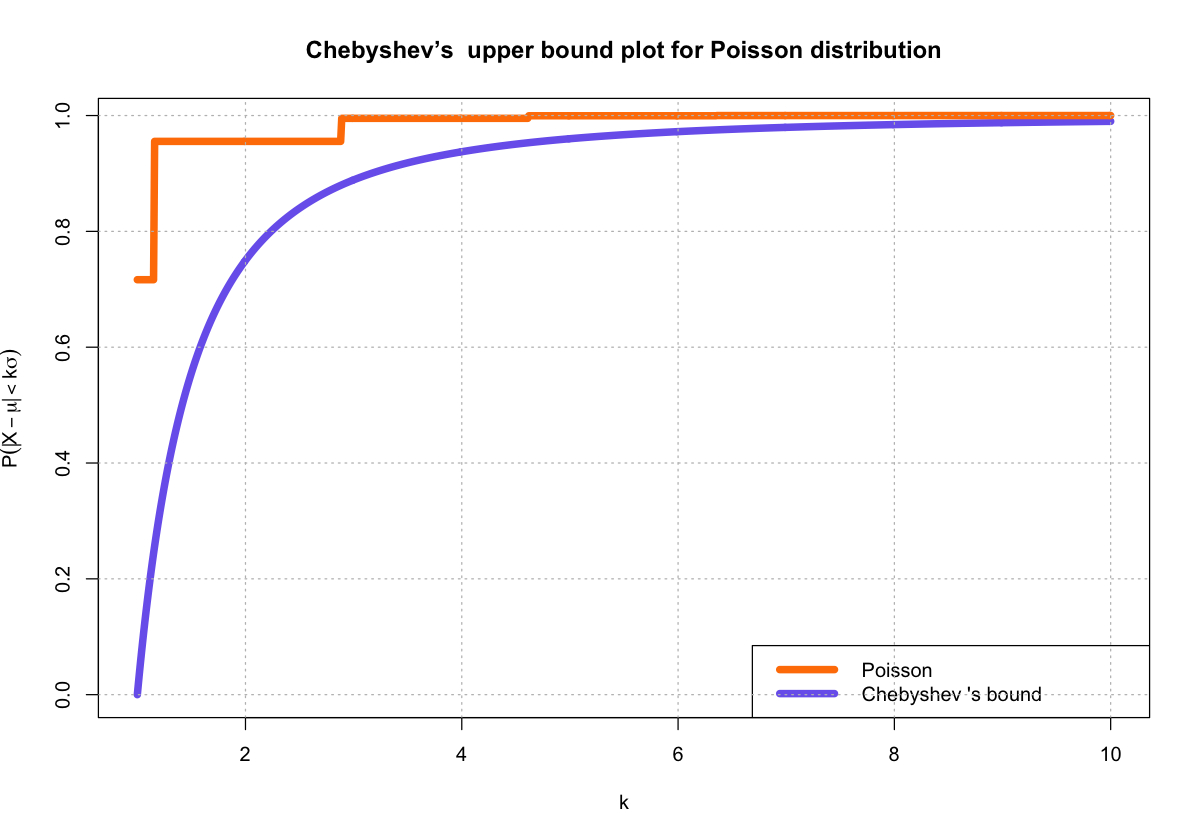

In [20]:
#poisson parameters
k<-seq(1,10,0.01)
lamda<-1/3
E<- lamda
sigma<- sqrt(lamda)

#exponential cdf
g<-ppois(k*sigma+E,  lamda)-ppois(-k*sigma+E, lamda)
#Chebyshev
c<- 1-1/k^2


options(repr.plot.width=10, repr.plot.height=7)


plot(k,c,
     type="l",
     col="slateblue2", 
     lwd=6,
     xlab="k",
     main="Chebyshev’s  upper bound plot for Poisson distribution",
      ylab = expression(P( abs( X - mu) <  k*sigma)))

lines (k,g,
     type="l", 
     col="darkorange1", 
     las=1,
     lwd=6,
      ylim=c(0,0.4))


#legend
legend(x = "bottomright",
       col = c("darkorange1", "slateblue2"),
       lty = 1,
       lwd = 6,
       legend = c('Poisson ', 'Chebyshev \'s bound')) 

#grid
grid(nx=NULL,
     ny=NULL,
     lty=3,
     col="gray",
     lwd=1) 


# EXERCISE 4

## The six boxes toy model is described in reference : https://arxiv.org/pdf/1701.01143.pdf 
## Labeling the boxes as follows:


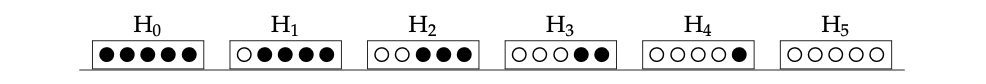

In [48]:
display_png(file="im.png")  

## write a program in R that:

## 1) allows the user to insert the color of a randomly extracted box and prints on the standard output the probability of selecting each box


In this part of code I put the inital values for the boxes.
Than with $n$ I indicate the number of the extraction (n=0 $\longrightarrow$ no extraction, n=1 $\longrightarrow$ 1th extraction, and so on) and with $x$ the number of white that are been drawn until the n-th extraction.
So by changing $n$ and $x$ is possible to insert manually the color randomly extracted from the box.


In [23]:
#initial values for the 5 boxes
N=5
i=0:N
pii=i/N

#initial probability without extraction

#number of extraction
cat("Insert the number of extraction:","\n")
n=0
cat("The number of extraction is:",n,"\n")

#color
cat("Insert the number of white drawn until now:","\n")
x=0
cat("The number of white drawn until now is:",x,"\n")

no<-( PBi = pii^x * (1-pii)^(n-x) / sum( pii^x * (1-pii)^(n-x) ) )

print(paste0( "the probability for box H0 at begging (no extraction) is:", " ", round(no[1],3)))
print(paste0( "the probability for box H1 at begging (no extraction) is:", " ", round(no[2],3)))
print(paste0( "the probability for box H2 at begging (no extraction) is:", " ", round(no[3],3)))
print(paste0( "the probability for box H3 at begging (no extraction) is:", " ", round(no[4],3)))
print(paste0( "the probability for box H4 at begging (no extraction) is:", " ", round(no[5],3)))
print(paste0( "the probability for box H5 at begging (no extraction) is:", " ", round(no[6],3)))

Insert the number of extraction: 
The number of extraction is: 0 
Insert the number of white drawn until now: 
The number of white drawn until now is: 0 
[1] "the probability for box H0 at begging (no extraction) is: 0.167"
[1] "the probability for box H1 at begging (no extraction) is: 0.167"
[1] "the probability for box H2 at begging (no extraction) is: 0.167"
[1] "the probability for box H3 at begging (no extraction) is: 0.167"
[1] "the probability for box H4 at begging (no extraction) is: 0.167"
[1] "the probability for box H5 at begging (no extraction) is: 0.167"


In [24]:
#first  extraction with Black result
cat("Insert the number of extraction:","\n")
n=1
cat("The number of extraction is:",n,"\n")

#color=0 white because we got a black
cat("Insert the number of white drawn until now:","\n")
x=0
cat("The number of white drawn until now is:",x,"\n")


n1<-( PBi = pii^x * (1-pii)^(n-x) / sum( pii^x * (1-pii)^(n-x) ) )

print(paste0("The inserted color is:", " ", "Black"))
print(paste0( "the probability for box H0 after extraction", " " , n, " ", " who gave a black  is:", " ", round(n1[1],3)))
print(paste0( "the probability for box H1 after extraction", " " , n, " ", " who gave a black  is:", " ", round(n1[2],3)))
print(paste0( "the probability for box H2 after extraction", " " , n, " ", " who gave a black  is:", " ", round(n1[3],3)))
print(paste0( "the probability for box H3 after extraction", " " , n, " ", " who gave a black  is:", " ", round(n1[4],3)))
print(paste0( "the probability for box H4 after extraction", " " , n, " ", " who gave a black  is:", " ", round(n1[5],3)))
print(paste0( "the probability for box H5 after extraction", " " , n, " ", " who gave a black  is:", " ", round(n1[6],3)))

Insert the number of extraction: 
The number of extraction is: 1 
Insert the number of white drawn until now: 
The number of white drawn until now is: 0 
[1] "The inserted color is: Black"
[1] "the probability for box H0 after extraction 1  who gave a black  is: 0.333"
[1] "the probability for box H1 after extraction 1  who gave a black  is: 0.267"
[1] "the probability for box H2 after extraction 1  who gave a black  is: 0.2"
[1] "the probability for box H3 after extraction 1  who gave a black  is: 0.133"
[1] "the probability for box H4 after extraction 1  who gave a black  is: 0.067"
[1] "the probability for box H5 after extraction 1  who gave a black  is: 0"


In [25]:
#second  extraction with white result
cat("Insert the number of extraction:","\n")
n=2
cat("The number of extraction is:",n,"\n")

#color
cat("Insert the number of white drawn until now:","\n")
x=1
cat("The number of white drawn until now is:",x,"\n")


n2<-( PBi = pii^x * (1-pii)^(n-x) / sum( pii^x * (1-pii)^(n-x) ) )

print(paste0("The inserted color is:", " ", "Black"))
print(paste0( "the probability for box H0 after  extraction", " " , n, " ", " who gave a black  is:", " ", round(n2[1],3)))
print(paste0( "the probability for box H1 after  extraction", " " , n, " ", " who gave a black  is:", " ", round(n2[2],3)))
print(paste0( "the probability for box H2 after  extraction", " " , n, " ", " who gave a black  is:", " ", round(n2[3],3)))
print(paste0( "the probability for box H3 after  extraction", " " , n, " ", " who gave a black  is:", " ", round(n2[4],3)))
print(paste0( "the probability for box H4 after  extraction", " " , n, " ", " who gave a black  is:", " ", round(n2[5],3)))
print(paste0( "the probability for box H5 after  extraction", " " , n, " ", " who gave a black  is:", " ", round(n2[6],3)))

Insert the number of extraction: 
The number of extraction is: 2 
Insert the number of white drawn until now: 
The number of white drawn until now is: 1 
[1] "The inserted color is: Black"
[1] "the probability for box H0 after  extraction 2  who gave a black  is: 0"
[1] "the probability for box H1 after  extraction 2  who gave a black  is: 0.2"
[1] "the probability for box H2 after  extraction 2  who gave a black  is: 0.3"
[1] "the probability for box H3 after  extraction 2  who gave a black  is: 0.3"
[1] "the probability for box H4 after  extraction 2  who gave a black  is: 0.2"
[1] "the probability for box H5 after  extraction 2  who gave a black  is: 0"


## 2)Plots the probability for each box as a function of the extraction step

### Two extractions

In the first plot below I reported the value of probabilities for the boxes for the first two extractions in which a black and a white have been drawn.

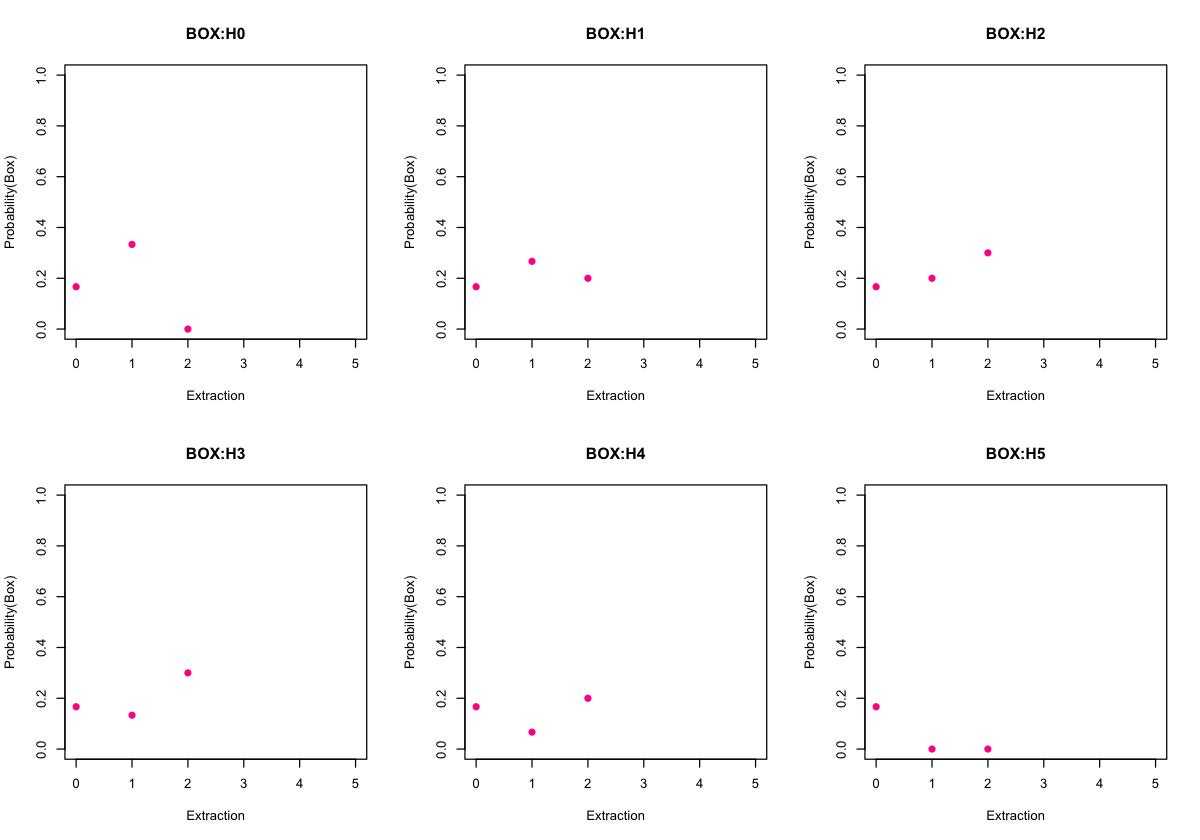

In [26]:
#vector with colors sequence
E<-c("/","B","W")
#vector with number of trial
Trial<-c(0,1,2)
#dataframe with exactrion probability values for each boxe
df<-data.frame(no,n1,n2)
#dataframa with E,Trial, and exactrion probability
df2<-data.frame(Trial,E,t(df))
colnames(df2)<-c("Trial","E", "H0","H1","H2","H3","H4","H5")

#plot for the first extraction
par(mfrow=c(2,3))

plot(df2$Trial,
     df2$H0,
     ylim=c(0,1),
     xlim=c(0,5),
     col="deeppink",
    main="BOX:H0",
    xlab="Extraction",
    ylab="Probability(Box)",
    pch=19)

plot(df2$Trial,
     df2$H1,
     ylim=c(0,1),
      xlim=c(0,5),
     col="deeppink",
    main="BOX:H1",
    xlab="Extraction",
    ylab="Probability(Box)",
    pch=19)



plot(df2$Trial,
     df2$H2,
     ylim=c(0,1),
      xlim=c(0,5),
     col="deeppink",
    main="BOX:H2",
    xlab="Extraction",
    ylab="Probability(Box)",
    pch=19)




plot(df2$Trial,
     df2$H3,
     ylim=c(0,1),
      xlim=c(0,5),
     col="deeppink",
    main="BOX:H3",
    xlab="Extraction",
    ylab="Probability(Box)",
    pch=19)



plot(df2$Trial,
     df2$H4,
     ylim=c(0,1),
      xlim=c(0,5),
     col="deeppink",
    main="BOX:H4",
    xlab="Extraction",
    ylab="Probability(Box)",
    pch=19)



plot(df2$Trial,
     df2$H5,
     ylim=c(0,1),
      xlim=c(0,5),
     col="deeppink",
    main="BOX:H5",
    xlab="Extraction",
    ylab="Probability(Box)",
    pch=19)





### Plot for 20 extractions

In this part of code I computed the probabilities for 20 extractrions.
In particular until the 14-th extraction I used the sequence of colors reported at slide 10-11 of  " AdvStat 4 PhysAna - Stat 04 " explained by professor A. Garfagnini while the last 6 colors has been chosen randomly. 

The sequence is:
#### $B,B,B,B,B,B,B,B,B,B,B,B,B,W,W,W,B,W,W,B$

The number of extraction is: 20 
The number of white drawn until now is: 5 
The results for 20 extractions are: 


,Trial,E,H0,H1,H2,H3,H4,H5
no,0,/,0.1666667,0.16666667,0.166666667,1.666667e-01,1.666667e-01,0.1666667
n1,1,B,0.3333333,0.26666667,0.200000000,1.333333e-01,6.666667e-02,0.0000000
n2,2,B,0.4545455,0.29090909,0.163636364,7.272727e-02,1.818182e-02,0.0000000
n3,3,B,0.5555556,0.28444444,0.120000000,3.555556e-02,4.444444e-03,0.0000000
n4,4,B,0.6384065,0.26149132,0.082737487,1.634321e-02,1.021450e-03,0.0000000
n5,5,B,0.7062147,0.23141243,0.054915254,7.231638e-03,2.259887e-04,0.0000000
n6,6,B,0.7616378,0.19965879,0.035534974,3.119669e-03,4.874482e-05,0.0000000
n7,7,B,0.8068681,0.16921250,0.022587142,1.321973e-03,1.032791e-05,0.0000000
n8,8,B,0.8437208,0.14155286,0.014171269,5.529408e-04,2.159925e-06,0.0000000
n9,9,B,0.8736997,0.11726598,0.008804880,2.290351e-04,4.473342e-07,0.0000000


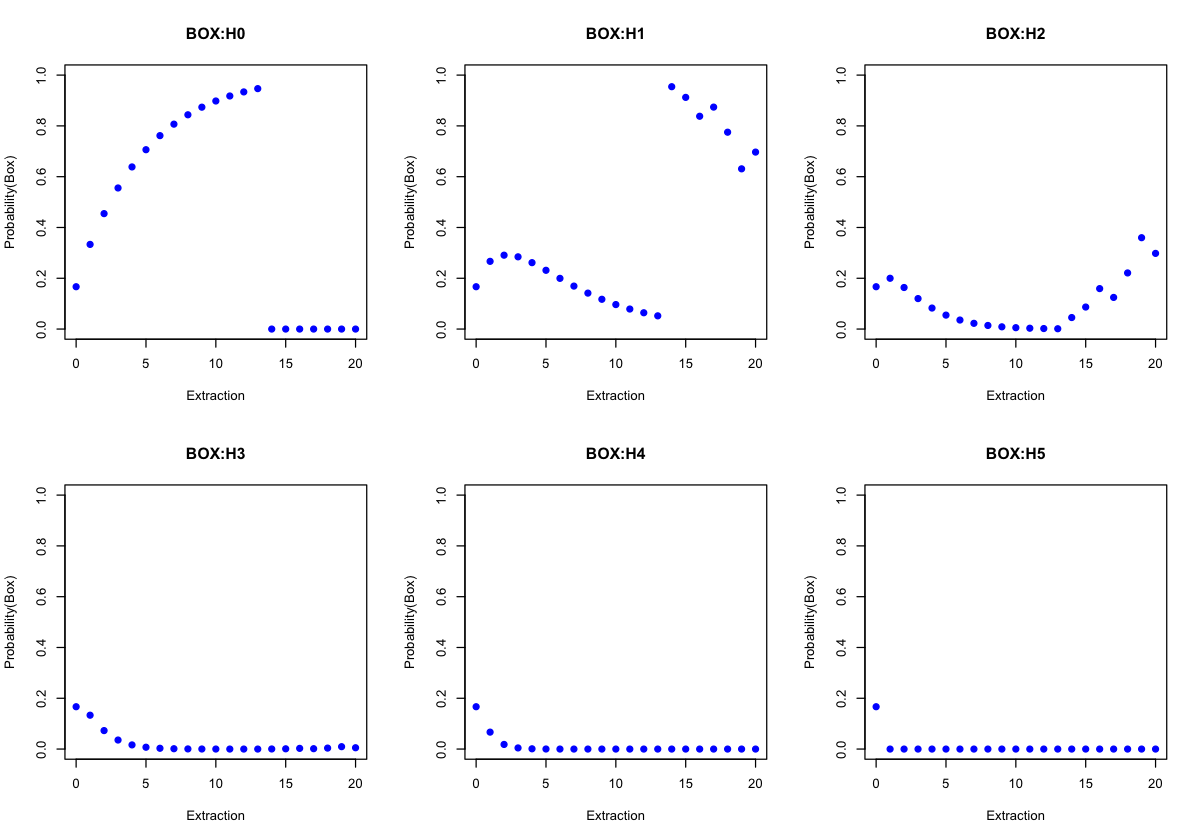

In [30]:
#no-extraction
n=0
x=0
no<-( PBi = pii^x * (1-pii)^(n-x) / sum( pii^x * (1-pii)^(n-x) ) )

#1th
n=1
x=0
n1<-( PBi = pii^x * (1-pii)^(n-x) / sum( pii^x * (1-pii)^(n-x) ) )

#2th
n=2
x=0
n2<-( PBi = pii^x * (1-pii)^(n-x) / sum( pii^x * (1-pii)^(n-x) ) )

#3th
n=3
x=0
n3<-( PBi = pii^x * (1-pii)^(n-x) / sum( pii^x * (1-pii)^(n-x) ) )

#4th
n=4
x=0
n4<-( PBi = pii^x * (1-pii)^(n-x) / sum( pii^x * (1-pii)^(n-x) ) )

#5th
n=5
x=0
n5<-( PBi = pii^x * (1-pii)^(n-x) / sum( pii^x * (1-pii)^(n-x) ) )

#6th
n=6
x=0
n6<-( PBi = pii^x * (1-pii)^(n-x) / sum( pii^x * (1-pii)^(n-x) ) )


#7th
n=7
x=0
n7<-( PBi = pii^x * (1-pii)^(n-x) / sum( pii^x * (1-pii)^(n-x) ) )

#8th
n=8
x=0
n8<-( PBi = pii^x * (1-pii)^(n-x) / sum( pii^x * (1-pii)^(n-x) ) )

#9th
n=9
x=0
n9<-( PBi = pii^x * (1-pii)^(n-x) / sum( pii^x * (1-pii)^(n-x) ) )

#10th
n=10
x=0
n10<-( PBi = pii^x * (1-pii)^(n-x) / sum( pii^x * (1-pii)^(n-x) ) )

#11th
n=11
x=0
n11<-( PBi = pii^x * (1-pii)^(n-x) / sum( pii^x * (1-pii)^(n-x) ) )

#12th
n=12
x=0
n12<-( PBi = pii^x * (1-pii)^(n-x) / sum( pii^x * (1-pii)^(n-x) ) )

#13th
n=13
x=0
n13<-( PBi = pii^x * (1-pii)^(n-x) / sum( pii^x * (1-pii)^(n-x) ) )

#14th
n=14
x=1
n14<-( PBi = pii^x * (1-pii)^(n-x) / sum( pii^x * (1-pii)^(n-x) ) )

#15th
n=15
x=2
n15<-( PBi = pii^x * (1-pii)^(n-x) / sum( pii^x * (1-pii)^(n-x) ) )

#16th
n=16
x=3
n16<-( PBi = pii^x * (1-pii)^(n-x) / sum( pii^x * (1-pii)^(n-x) ) )

#17th
n=17
x=3
n17<-( PBi = pii^x * (1-pii)^(n-x) / sum( pii^x * (1-pii)^(n-x) ) )

#18th
n=18
x=4
n18<-( PBi = pii^x * (1-pii)^(n-x) / sum( pii^x * (1-pii)^(n-x) ) )

#19th
n=19
x=5
n19<-( PBi = pii^x * (1-pii)^(n-x) / sum( pii^x * (1-pii)^(n-x) ) )

#20th
n=20
x=5
n20<-( PBi = pii^x * (1-pii)^(n-x) / sum( pii^x * (1-pii)^(n-x) ) )

#vector with trials
trial<-c(0:20)

#vector with sequence of color
E<- c("/", "B","B","B","B","B","B","B","B","B","B","B","B","B","W","W","W","B","W","W","B")

#dataframe with results
df<-data.frame(no,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15,n16,n17,n18,n19,n20)
df2<-data.frame(trial,E,t(df))
colnames(df2)<-c("Trial","E", "H0","H1","H2","H3","H4","H5")

#number of extraction
cat("The number of extraction is:",n,"\n")

#color
cat("The number of white drawn until now is:",x,"\n")



cat("The results for 20 extractions are:","\n")
df2

#plot them
par(mfrow=c(2,3))

plot(df2$Trial,
     df2$H0,
     ylim=c(0,1),
     col="blue",
    main="BOX:H0",
    xlab="Extraction",
    ylab="Probability(Box)",
    pch=19)

plot(df2$Trial,
     df2$H1,
     ylim=c(0,1),
     col="blue",
    main="BOX:H1",
    xlab="Extraction",
    ylab="Probability(Box)",
    pch=19)



plot(df2$Trial,
     df2$H2,
     ylim=c(0,1),
     col="blue",
    main="BOX:H2",
    xlab="Extraction",
    ylab="Probability(Box)",
    pch=19)




plot(df2$Trial,
     df2$H3,
     ylim=c(0,1),
     col="blue",
    main="BOX:H3",
    xlab="Extraction",
    ylab="Probability(Box)",
    pch=19)



plot(df2$Trial,
     df2$H4,
     ylim=c(0,1),
     col="blue",
    main="BOX:H4",
    xlab="Extraction",
    ylab="Probability(Box)",
    pch=19)



plot(df2$Trial,
     df2$H5,
     ylim=c(0,1),
     col="blue",
    main="BOX:H5",
    xlab="Extraction",
    ylab="Probability(Box)",
    pch=19)



# EXERCISE 5

## Consider again the six boxes toy model of the previous exercise and write a simulation program that:

## 1) selects a random box;

## 2) makes random sampling from the box;

## 3) prints on the standard output the probability of       selecting each box;

## 4) plots the probability for each box as a function       of the number of trial

This program enable to simulate the "six boxes toy models". In particular  $m$= number of trials that the user want to consider, so by changing $m$ is possible to simulate different number of trials.
Furthermore, at the end this program gives:

-the number of trials simulated;

-the randomly selected box with the highes probability from Bayesian inference;

-the number of white  randomly generated;

-the number of black  randomly generated;

-the table with all probability's values for each box for each trial and the sequence of colors generated randomly;

-the plots for the probabilities for each boxe as a function of the number of trial


### Run results: 20 samplings

The number of trials is: 20 
The number of white  is: 3 
The number of black  is: 17 
The probabilities of each box computed by the simulation are shown in table below:

E,Trial,H0,H1,H2,H3,H4,H5
/,0,0.1666667,0.1666667,0.16666667,0.1666666667,1.666667e-01,0.1666667
B,1,0.3333333,0.2666667,0.20000000,0.1333333333,6.666667e-02,0.0000000
W,2,0.0000000,0.2000000,0.30000000,0.3000000000,2.000000e-01,0.0000000
B,3,0.0000000,0.3200000,0.36000000,0.2400000000,8.000000e-02,0.0000000
B,4,0.0000000,0.4383562,0.36986301,0.1643835616,2.739726e-02,0.0000000
B,5,0.0000000,0.5446809,0.34468085,0.1021276596,8.510638e-03,0.0000000
B,6,0.0000000,0.6360248,0.30186335,0.0596273292,2.484472e-03,0.0000000
B,7,0.0000000,0.7123478,0.25356522,0.0333913043,6.956522e-04,0.0000000
W,8,0.0000000,0.5386639,0.38348238,0.0757496055,2.104156e-03,0.0000000
B,9,0.0000000,0.6229658,0.33262357,0.0438022814,6.083650e-04,0.0000000


The  box extracted is:

,Probability
H1,0.9430923


The box inferred is the one with the highest probability from Bayesian inference

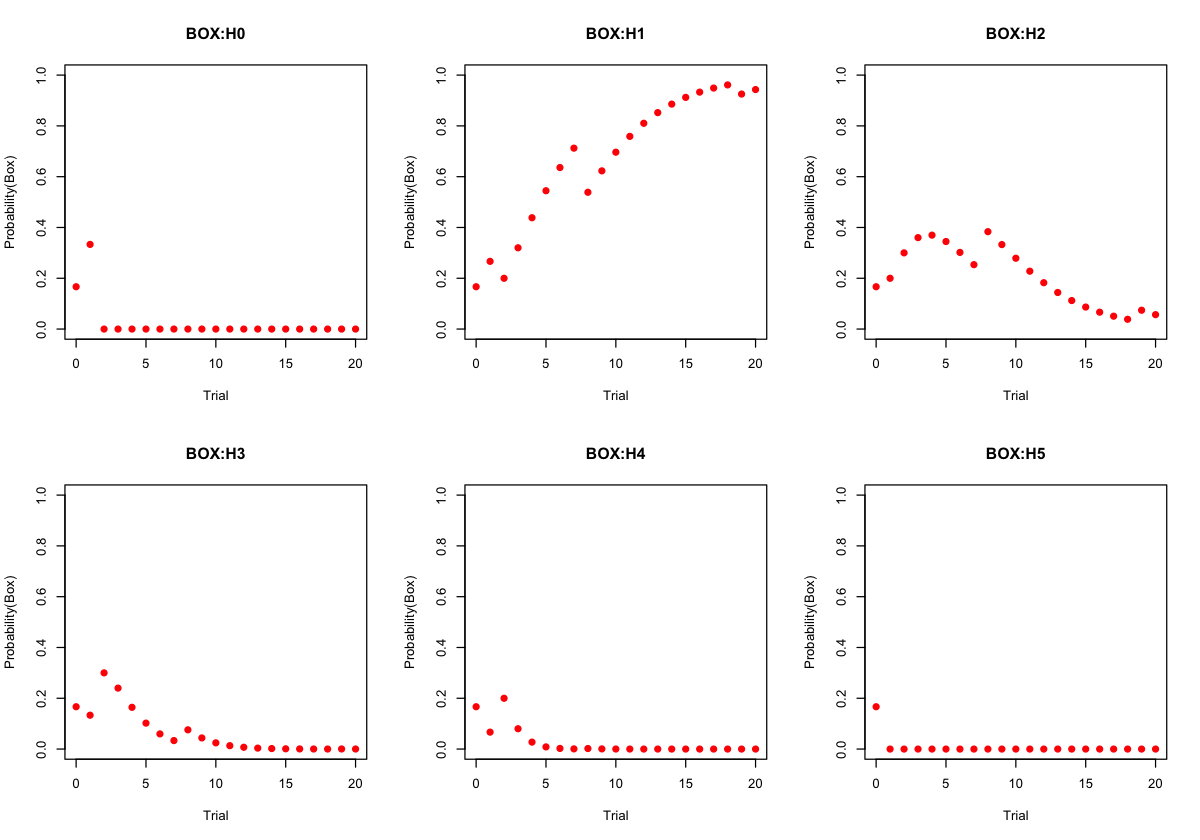

In [31]:
#initial values
N=5
i=0:N
pii=i/N

#number of trials
m=20

#selects random box
ri = sample(i, 1)


#random generation of black and white sequence
z<-( s=rbinom(m,1,pii[ri+1]) )

#probability with no extraction
first<- rep(1/6,6)

#vector for each box with no extraction probabilities
h5<-first[6]
h4<-first[5]
h3<-first[4]
h2<-first[3]
h1<-first[2]
h0<- first[1]

#initial values for cicle, in particular x= number of white
n=0
x=0

#for to compute the simulation of random sampling from the boxes
for(i in z){ 
    n=n+1
    if( i==0){
        x=x+1
    }
    else(i==1)
    {
        x=x
    }
      
   PBi =  pii^x * (1-pii)^(n-x) / sum( pii^x * (1-pii)^(n-x) ) 

   h0<-append(h0,PBi[1])
   h1<-append(h1,PBi[2])
   h2<-append(h2,PBi[3])
   h3<-append(h3,PBi[4])
   h4<-append(h4,PBi[5])
   h5<-append(h5,PBi[6])
   x<-x
     }

#replace number 0 and 1 with "W" and "B" to understand which is black and which is white
z2<-z
for(i in z){
    if(i==0){
        z2[z2==0]<-"W"}
    else(i==1)
    {
         z2[z2==1]<-"B"}

    }



#number of trials
Trial<-c(0:m)
cat("The number of trials is:" ,  m,"\n")

#number of white
cat("The number of white  is:", x, "\n")

#number of black
b<-m-x
cat("The number of black  is:" , b,"\n")

#the random sequence of colors
z2<-c("/",z2)

#dataframe with probabilities values
df2<-data.frame(z2,Trial,h0,h1,h2,h3,h4,h5)
colnames(df2)<-c("E","Trial", "H0","H1","H2","H3","H4","H5")
cat("The probabilities of each box computed by the simulation are shown in table below:")
df2

#selected box with higher probability
cat("The  box extracted is:")

df3<-df2[m+1,3:8]
df3<-t(df3)
colnames(df3)<-c("Probability")
BOX<-c("H0","H1","H2","H3","H4","H5")
df4<-data.frame(BOX,df3)
df4<-df4[which.max(df4$Probability),]
df4[1, ]['Probability']
cat("The box inferred is the one with the highest probability from Bayesian inference")


#plot them
par(mfrow=c(2,3))

plot(df2$Trial,
     df2$H0,
     ylim=c(0,1),
     col="red",
    main="BOX:H0",
    xlab="Trial",
    ylab="Probability(Box)",
    pch=19)

plot(df2$Trial,
     df2$H1,
     ylim=c(0,1),
     col="red",
    main="BOX:H1",
    xlab="Trial",
    ylab="Probability(Box)",
    pch=19)



plot(df2$Trial,
     df2$H2,
     ylim=c(0,1),
     col="red",
    main="BOX:H2",
    xlab="Trial",
    ylab="Probability(Box)",
    pch=19)




plot(df2$Trial,
     df2$H3,
     ylim=c(0,1),
     col="red",
    main="BOX:H3",
    xlab="Trial",
    ylab="Probability(Box)",
    pch=19)



plot(df2$Trial,
     df2$H4,
     ylim=c(0,1),
     col="red",
    main="BOX:H4",
    xlab="Trial",
    ylab="Probability(Box)",
    pch=19)



plot(df2$Trial,
     df2$H5,
     ylim=c(0,1),
     col="red",
    main="BOX:H5",
    xlab="Trial",
    ylab="Probability(Box)",
    pch=19)

### Run results: 60 samplings

The number of trials is: 60 
The number of white  is: 12 
The number of black  is: 48 
The probabilities of each box computed by the simulation are shown in table below:

E,Trial,H0,H1,H2,H3,H4,H5
/,0,0.1666667,0.16666667,0.1666666667,1.666667e-01,1.666667e-01,0.1666667
B,1,0.3333333,0.26666667,0.2000000000,1.333333e-01,6.666667e-02,0.0000000
B,2,0.4545455,0.29090909,0.1636363636,7.272727e-02,1.818182e-02,0.0000000
B,3,0.5555556,0.28444444,0.1200000000,3.555556e-02,4.444444e-03,0.0000000
B,4,0.6384065,0.26149132,0.0827374872,1.634321e-02,1.021450e-03,0.0000000
B,5,0.7062147,0.23141243,0.0549152542,7.231638e-03,2.259887e-04,0.0000000
B,6,0.7616378,0.19965879,0.0355349744,3.119669e-03,4.874482e-05,0.0000000
B,7,0.8068681,0.16921250,0.0225871418,1.321973e-03,1.032791e-05,0.0000000
B,8,0.8437208,0.14155286,0.0141712691,5.529408e-04,2.159925e-06,0.0000000
B,9,0.8736997,0.11726598,0.0088048795,2.290351e-04,4.473342e-07,0.0000000


The  box extracted is:

,Probability
H1,0.9958931


The box inferred is the one with the highest probability from Bayesian inference

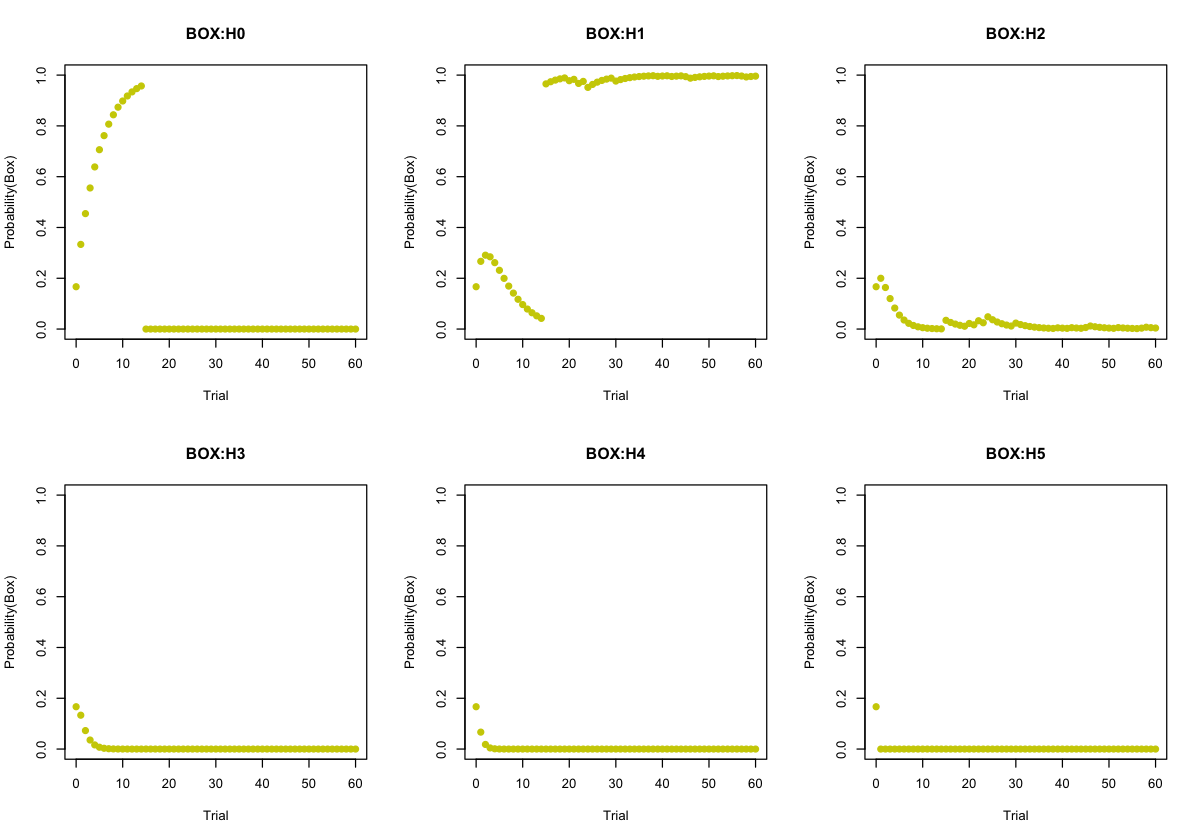

In [33]:
#initial values
N=5
i=0:N
pii=i/N

#number of trials
m=60

#selects random box
ri = sample(i, 1)


#random generation of black and white sequence
z<-( s=rbinom(m,1,pii[ri+1]) )

#probability with no extraction
first<- rep(1/6,6)

#vector for each box with no extraction probabilities
h5<-first[6]
h4<-first[5]
h3<-first[4]
h2<-first[3]
h1<-first[2]
h0<- first[1]

#initial values for cicle, in particular x= number of white
n=0
x=0

#for to compute the simulation of random sampling from the boxes
for(i in z){ 
    n=n+1
    if( i==0){
        x=x+1
    }
    else(i==1)
    {
        x=x
    }
      
   PBi =  pii^x * (1-pii)^(n-x) / sum( pii^x * (1-pii)^(n-x) ) 

   h0<-append(h0,PBi[1])
   h1<-append(h1,PBi[2])
   h2<-append(h2,PBi[3])
   h3<-append(h3,PBi[4])
   h4<-append(h4,PBi[5])
   h5<-append(h5,PBi[6])
   x<-x
     }

#replace number 0 and 1 with "W" and "B" to understand which is black and which is white
z2<-z
for(i in z){
    if(i==0){
        z2[z2==0]<-"W"
    }
    else(i==1)
    {
         z2[z2==1]<-"B"
    }

    }




#number of trials
Trial<-c(0:m)
cat("The number of trials is:" ,  m,"\n")

#number of white
cat("The number of white  is:", x, "\n")

#number of black
b<-m-x
cat("The number of black  is:" , b,"\n")

#the random sequence of colors
z2<-c("/",z2)

#dataframe with probabilities values
df2<-data.frame(z2,Trial,h0,h1,h2,h3,h4,h5)

colnames(df2)<-c("E","Trial", "H0","H1","H2","H3","H4","H5")

cat("The probabilities of each box computed by the simulation are shown in table below:")
df2


#selected box with higher probability
cat("The  box extracted is:")

df3<-df2[m+1,3:8]
df3<-t(df3)
colnames(df3)<-c("Probability")
BOX<-c("H0","H1","H2","H3","H4","H5")
df4<-data.frame(BOX,df3)
df4<-df4[which.max(df4$Probability),]
df4[1, ]['Probability']
cat("The box inferred is the one with the highest probability from Bayesian inference")


#plot them
par(mfrow=c(2,3))

plot(df2$Trial,
     df2$H0,
     ylim=c(0,1),
     col="yellow3",
    main="BOX:H0",
    xlab="Trial",
    ylab="Probability(Box)",
    pch=19)

plot(df2$Trial,
     df2$H1,
     ylim=c(0,1),
     col="yellow3",
    main="BOX:H1",
    xlab="Trial",
    ylab="Probability(Box)",
    pch=19)



plot(df2$Trial,
     df2$H2,
     ylim=c(0,1),
     col="yellow3",
    main="BOX:H2",
    xlab="Trial",
    ylab="Probability(Box)",
    pch=19)




plot(df2$Trial,
     df2$H3,
     ylim=c(0,1),
     col="yellow3",
    main="BOX:H3",
    xlab="Trial",
    ylab="Probability(Box)",
    pch=19)



plot(df2$Trial,
     df2$H4,
     ylim=c(0,1),
     col="yellow3",
    main="BOX:H4",
    xlab="Trial",
    ylab="Probability(Box)",
    pch=19)



plot(df2$Trial,
     df2$H5,
     ylim=c(0,1),
     col="yellow3",
    main="BOX:H5",
    xlab="Trial",
    ylab="Probability(Box)",
    pch=19)



### Run results: 100 samplings

The number of trials is: 100 
The number of white  is: 78 
The number of black  is: 22 
The probabilities of each box computed by the simulation are shown in table below:

E,Trial,H0,H1,H2,H3,H4,H5
/,0,0.1666667,1.666667e-01,0.166666667,0.1666667,0.1666667,0.1666667
W,1,0.0000000,6.666667e-02,0.133333333,0.2000000,0.2666667,0.3333333
B,2,0.0000000,2.000000e-01,0.300000000,0.3000000,0.2000000,0.0000000
B,3,0.0000000,3.200000e-01,0.360000000,0.2400000,0.0800000,0.0000000
W,4,0.0000000,1.538462e-01,0.346153846,0.3461538,0.1538462,0.0000000
W,5,0.0000000,6.153846e-02,0.276923077,0.4153846,0.2461538,0.0000000
B,6,0.0000000,1.142857e-01,0.385714286,0.3857143,0.1142857,0.0000000
W,7,0.0000000,4.571429e-02,0.308571429,0.4628571,0.1828571,0.0000000
W,8,0.0000000,1.642710e-02,0.221765914,0.4989733,0.2628337,0.0000000
W,9,0.0000000,5.460751e-03,0.147440273,0.4976109,0.3494881,0.0000000


The  box extracted is:

,Probability
H4,0.9992465


The box inferred is the one with the highest probability from Bayesian inference

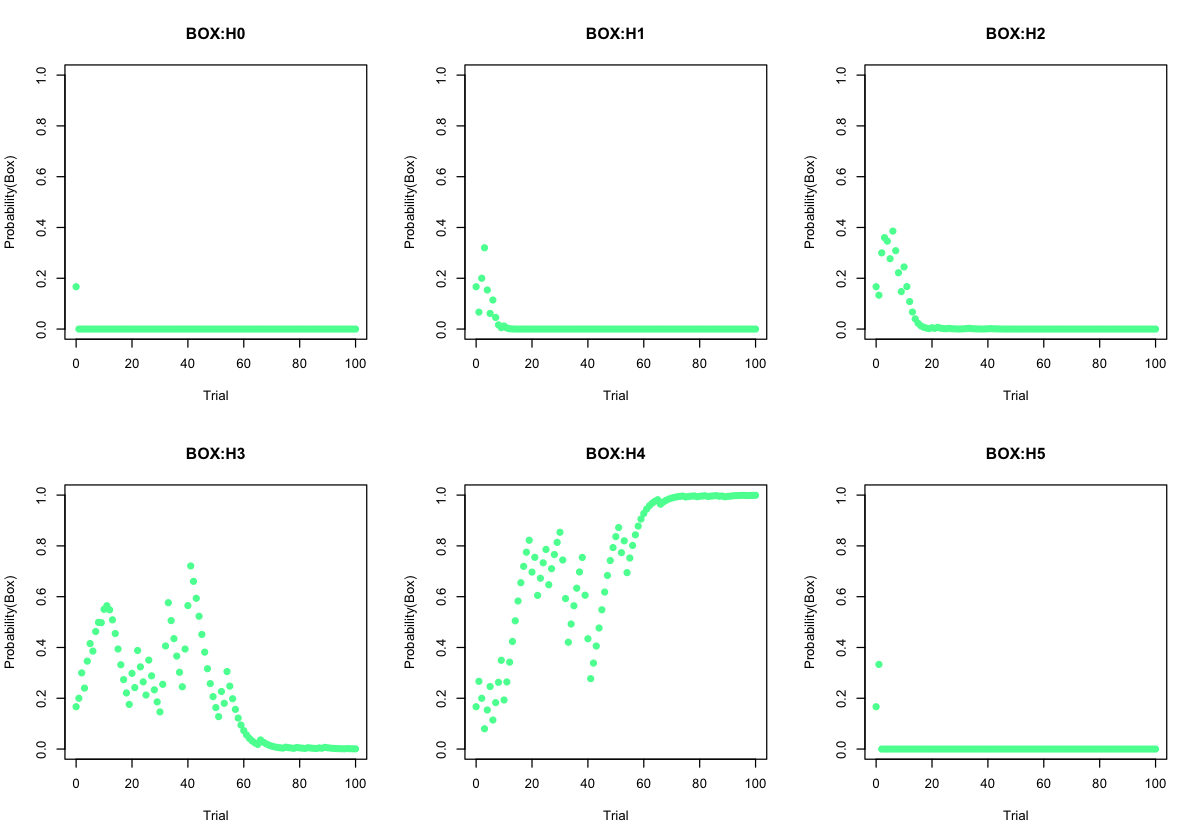

In [34]:
#initial values
N=5
i=0:N
pii=i/N

#number of trials
m=100

#selects random box
ri = sample(i, 1)


#random generation of black and white sequence
z<-( s=rbinom(m,1,pii[ri+1]) )

#probability with no extraction
first<- rep(1/6,6)

#vector for each box with no extraction probabilities
h5<-first[6]
h4<-first[5]
h3<-first[4]
h2<-first[3]
h1<-first[2]
h0<- first[1]

#initial values for cicle, in particular x= number of white
n=0
x=0

#for to compute the simulation of random sampling from the boxes
for(i in z){ 
    n=n+1
    if( i==0){
        x=x+1
    }
    else(i==1)
    {
        x=x
    }
      
   PBi =  pii^x * (1-pii)^(n-x) / sum( pii^x * (1-pii)^(n-x) ) 

   h0<-append(h0,PBi[1])
   h1<-append(h1,PBi[2])
   h2<-append(h2,PBi[3])
   h3<-append(h3,PBi[4])
   h4<-append(h4,PBi[5])
   h5<-append(h5,PBi[6])
   x<-x
     }

#replace number 0 and 1 with "W" and "B" to understand which is black and which is white
z2<-z
for(i in z){
    if(i==0){
        z2[z2==0]<-"W"
    }
    else(i==1)
    {
         z2[z2==1]<-"B"
    }

    }




#number of trials
Trial<-c(0:m)
cat("The number of trials is:" ,  m,"\n")

#number of white
cat("The number of white  is:", x, "\n")

#number of black
b<-m-x
cat("The number of black  is:" , b,"\n")

#the random sequence of colors
z2<-c("/",z2)

#dataframe with probabilities values
df2<-data.frame(z2,Trial,h0,h1,h2,h3,h4,h5)

colnames(df2)<-c("E","Trial", "H0","H1","H2","H3","H4","H5")

cat("The probabilities of each box computed by the simulation are shown in table below:")
df2


#selected box with higher probability
cat("The  box extracted is:")

df3<-df2[m+1,3:8]
df3<-t(df3)
colnames(df3)<-c("Probability")
BOX<-c("H0","H1","H2","H3","H4","H5")
df4<-data.frame(BOX,df3)
df4<-df4[which.max(df4$Probability),]
df4[1, ]['Probability']
cat("The box inferred is the one with the highest probability from Bayesian inference")


#plot them
par(mfrow=c(2,3))

plot(df2$Trial,
     df2$H0,
     ylim=c(0,1),
     col="seagreen1",
    main="BOX:H0",
    xlab="Trial",
    ylab="Probability(Box)",
    pch=19)

plot(df2$Trial,
     df2$H1,
     ylim=c(0,1),
     col="seagreen1",
    main="BOX:H1",
    xlab="Trial",
    ylab="Probability(Box)",
    pch=19)



plot(df2$Trial,
     df2$H2,
     ylim=c(0,1),
     col="seagreen1",
    main="BOX:H2",
    xlab="Trial",
    ylab="Probability(Box)",
    pch=19)




plot(df2$Trial,
     df2$H3,
     ylim=c(0,1),
     col="seagreen1",
    main="BOX:H3",
    xlab="Trial",
    ylab="Probability(Box)",
    pch=19)



plot(df2$Trial,
     df2$H4,
     ylim=c(0,1),
     col="seagreen1",
    main="BOX:H4",
    xlab="Trial",
    ylab="Probability(Box)",
    pch=19)



plot(df2$Trial,
     df2$H5,
     ylim=c(0,1),
     col="seagreen1",
    main="BOX:H5",
    xlab="Trial",
    ylab="Probability(Box)",
    pch=19)




So, In the  exercise 5 I wrote a R-code that enables us to simulate the sixe boxes toy model by picking up one random boxe and by randomly generating sequence of colors.
The difference between this program and the one in  exercise 4 is that the exercise 4 enables the user to insert for each step the color that he has just  drawn 
( so the user must draw from boxes as  we have done in class with professor Garfagnini and one student) while in the exercise 5 there  is  a simulation in which the user can simulate what could be happen if he considers a number of trials $m$. 
By the way if the sequence of colors inserted in  the two exercises (4 and 5) is  the same the 2 programs give the same result.